In [1]:
import pandas as pd
import h5py
import matplotlib.pyplot as plt
import numpy as np
import corner
from copy import deepcopy
from matplotlib import gridspec
import glob
import tqdm

from scipy.stats import dirichlet
import sys
sys.path.append('../')
from plot.nflows_paper.plot_functions import make_1D_result_discrete

PyCBC.libutils: pkg-config call failed, setting NO_PKGCONFIG=1


glasflow is using its own internal version of nflows


In [2]:
flow_filename = '/data/wiay/2297403c/amaze_model_select/AMAZE_model_selection/rns/flows_260924_alphaCE1simevents/output_250events_logalphaCE.hdf5'
flow_file = h5py.File(flow_filename, 'r')

flow_filename_50 = '/data/wiay/2297403c/amaze_model_select/AMAZE_model_selection/rns/Flows_050924_Neventschib2/output_50events_logalphaCE.hdf5'
flow_file_50 = h5py.File(flow_filename_50, 'r')

flow_filename_250 = '/data/wiay/2297403c/amaze_model_select/AMAZE_model_selection/rns/Flows_050924_Neventschib2/output_250events_logalphaCE.hdf5'
flow_file_250 = h5py.File(flow_filename_250, 'r')

chi_b = [0.,0.1,0.2,0.5]
alpha = [0.2,0.5,1.,2.,5.]

/Users/stormcolloms/Documents/PhD/Project_work/AMAZE_model_selection/rns/../plot/nflows_paper/plot_functions.py:253: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax_marg[hyper_idx].set_ylim(int(1e-3),20)


Text(0, 0.5, 'p($\\chi_{\\mathrm{b}}$)')

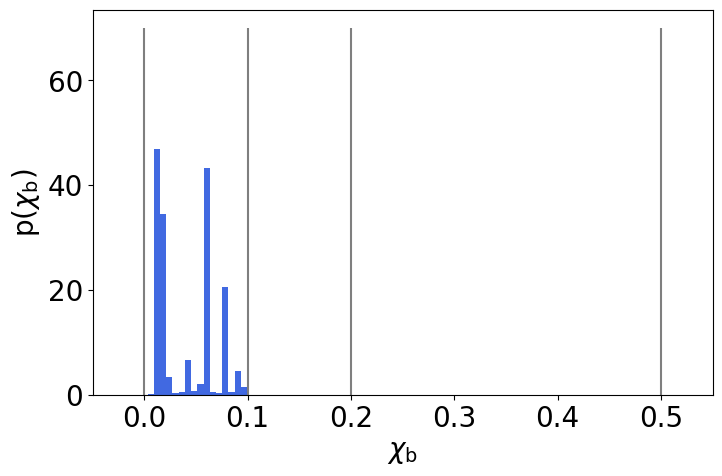

In [3]:
#relative samples in each chi_b
#relative samples in each alpha
plt.rcParams.update({'font.size': 20})
fig = plt.figure(figsize=(8,5))
chib_samps = list(flow_file['model_selection']['samples']['block0_values'][:,0])

plt.hist(chib_samps, density=True, label='flow', color='royalblue', bins=18)
for x in chi_b:
    plt.vlines(x, 0, 70, color='black', alpha=0.5)
#plt.ylim(0,70)
plt.xlim(-0.05,.55)
label = '$\chi_{\mathrm{b}}$'
plt.xlabel(r'$\chi_{\mathrm{b}}$')
plt.ylabel(r'p($\chi_{\mathrm{b}}$)')
#plt.savefig('/Users/stormcolloms/Documents/PhD/Project_work/AMAZE_model_selection/rns/Flows_140224_regularisation/plots/alpha_flow_KDEcomp.pdf')
#plt.savefig('/Users/stormcolloms/Documents/PhD/Project_work/AMAZE_model_selection/rns/Flows_140224_regularisation/plots/chib_flow_KDEcomp.pdf')

In [4]:
np.mean(chib_samps)

0.03983850634607826

In [3]:
flow_discrete = h5py.File('/data/wiay/2297403c/amaze_model_select/AMAZE_model_selection/rns/flows_260924_simeventsdisc_trainlogalpha/output_seed12.hdf5', 'r')

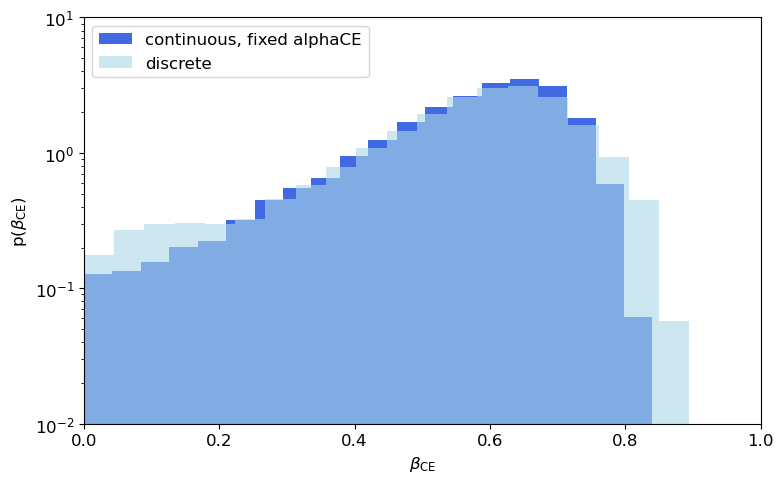

In [19]:
#relative samples in each alpha
plt.rcParams.update({'font.size': 12})
fig = plt.figure(figsize=(8,5))

alpha_samps = list(flow_file['model_selection']['samples']['block0_values'][:,1])

plt.hist(alpha_samps, density=True, label='continuous, fixed alphaCE', color='royalblue', bins=20)

disc_samps = list(flow_discrete['model_selection']['samples']['block0_values'][:,0])
plt.hist(disc_samps, density=True, label='discrete', color='lightblue', bins=20, alpha=0.6)
"""for a in alpha:
    plt.vlines(a, 0, 0.8, color='black', alpha=0.5)"""
plt.ylim(1e-2,10)
plt.xlim(0,1)
plt.yscale('log')
label = '$\alpha_{\mathrm{CE}}$'
plt.xlabel(r'$\beta_{\mathrm{CE}}$')
plt.ylabel(r'p($\beta_{\mathrm{CE}}$)')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('/Users/stormcolloms/Documents/PhD/Project_work/AMAZE_model_selection/rns/Flows_140224_regularisation/plots/alpha_flow_KDEcomp.pdf')

In [9]:
np.mean(alpha_samps)

4.010354551706366

NameError: name 'fig_data' is not defined

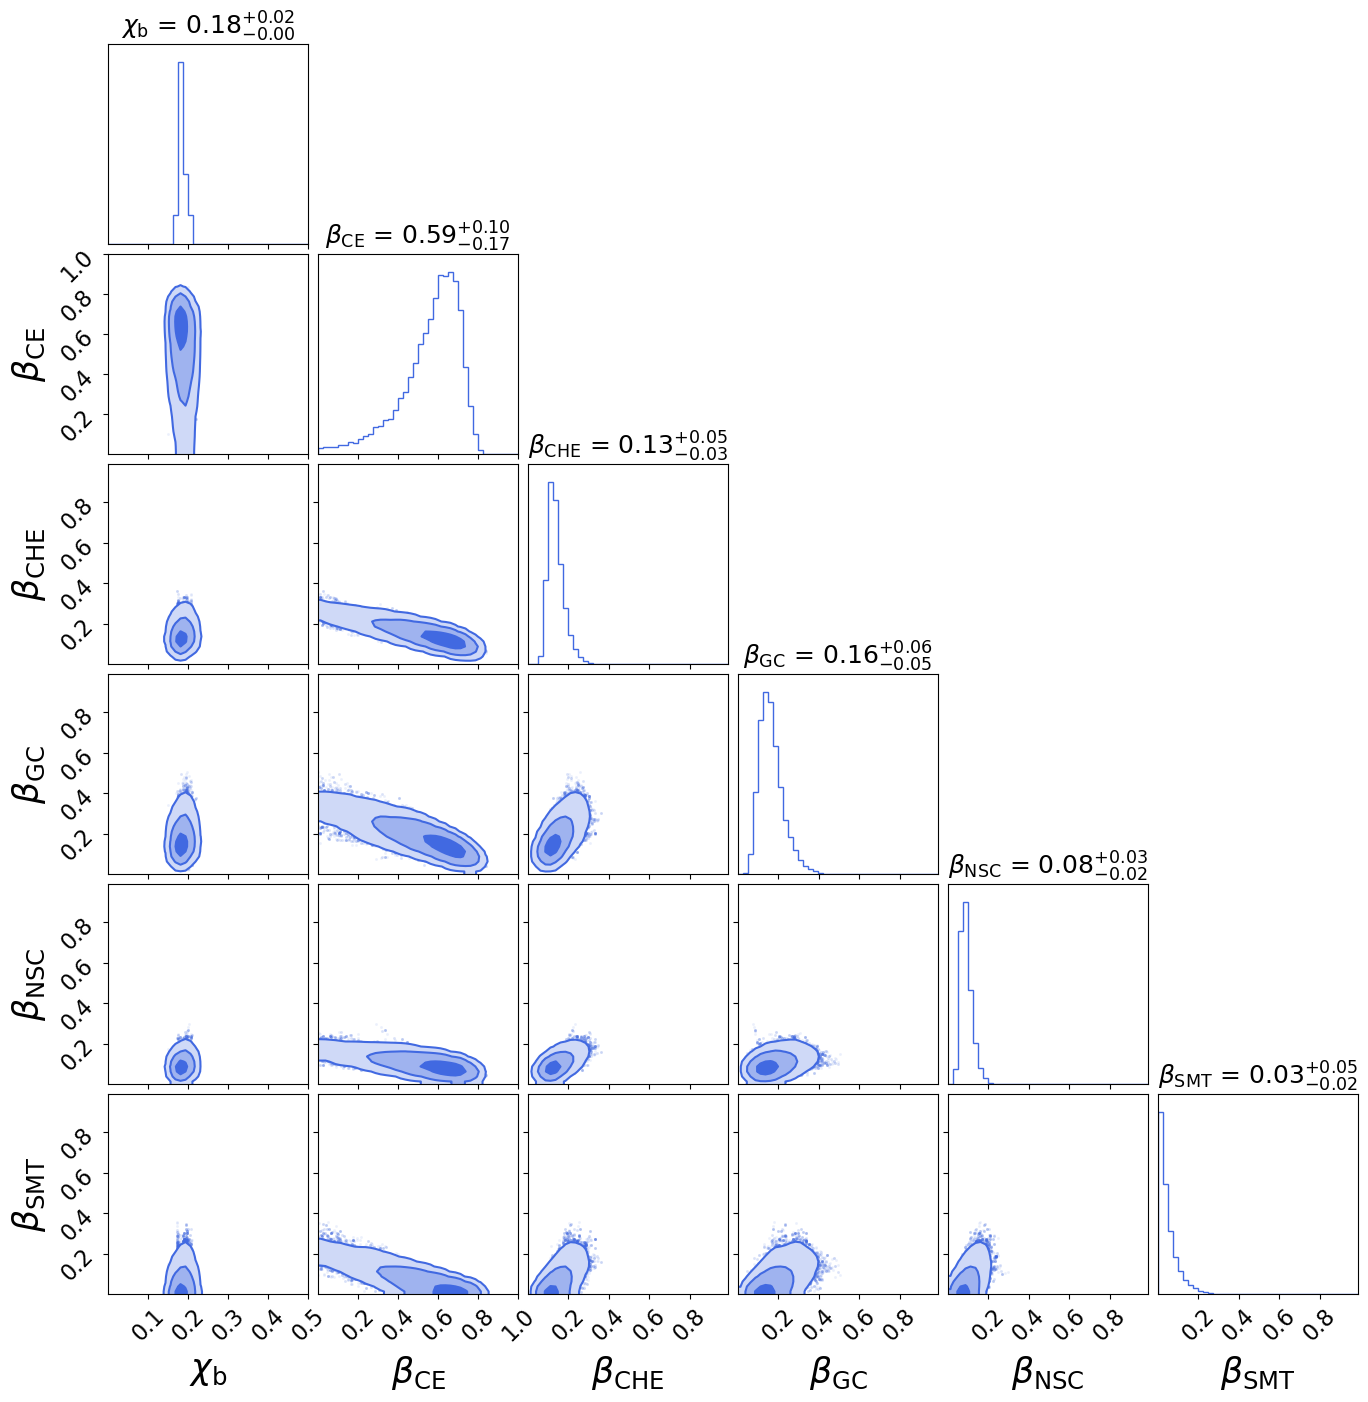

In [8]:
#corner plots of betas
plt.rcParams.update({'font.size': 16})


corner_kwargs = dict(
    bins=40,
    smooth=0.9,
    color="royalblue",
    #quantiles=[0.16, 0.84],
    levels=(1 - np.exp(-0.5), 1 - np.exp(-2), 1 - np.exp(-9 / 2.0)),
    plot_density=True,
    plot_datapoints=True,
    fill_contours=True,
    show_titles=True,
    hist_kwargs=dict(density=True),
    label_kwargs=dict(fontsize=25),
    title_kwargs=dict(fontsize=18),
    labels=[r'$\chi_\mathrm{b}$', r'$\beta_{\mathrm{CE}}$',r'$\beta_{\mathrm{CHE}}$',r'$\beta_{\mathrm{GC}}$',r'$\beta_{\mathrm{NSC}}$',r'$\beta_{\mathrm{SMT}}$'],
    range = [(0.,.5),(0.,1.),(0.,.99),(0.,.99),(0.,.99),(0.,.99)]
)

corner_kwargs_50 = dict(
    bins=40,
    smooth=0.9,
    color="lightskyblue",
    #quantiles=[0.16, 0.84],
    levels=(1 - np.exp(-0.5), 1 - np.exp(-2), 1 - np.exp(-9 / 2.0)),
    plot_density=True,
    plot_datapoints=True,
    fill_contours=True,
    show_titles=True,
    hist_kwargs=dict(density=True),
    label_kwargs=dict(fontsize=25),
    title_kwargs=dict(fontsize=18),
    labels=[r'$\chi_\mathrm{b}$', r'$\alpha_{\mathrm{CE}}$',r'$\beta_{\mathrm{CE}}$',r'$\beta_{\mathrm{CHE}}$',r'$\beta_{\mathrm{GC}}$',r'$\beta_{\mathrm{NSC}}$',r'$\beta_{\mathrm{SMT}}$'],
    range = [(0.,.5),(0.,5.),(0.,1.),(0.,.99),(0.,.99),(0.,.99),(0.,.99)]
)

corner_kwargs_250 = dict(
    bins=40,
    smooth=0.9,
    color="navy",
    #quantiles=[0.16, 0.84],
    levels=(1 - np.exp(-0.5), 1 - np.exp(-2), 1 - np.exp(-9 / 2.0)),
    plot_density=True,
    plot_datapoints=True,
    fill_contours=True,
    show_titles=True,
    hist_kwargs=dict(density=True),
    label_kwargs=dict(fontsize=25),
    title_kwargs=dict(fontsize=18),
    labels=[r'$\chi_\mathrm{b}$', r'$\beta_{\mathrm{CE}}$',r'$\beta_{\mathrm{CHE}}$',r'$\beta_{\mathrm{GC}}$',r'$\beta_{\mathrm{NSC}}$',r'$\beta_{\mathrm{SMT}}$'],
    range = [(0.,.5),(0.,1.),(0.,.99),(0.,.99),(0.,.99),(0.,.99)]
)


"""branching_fracs_50 = np.array(flow_file_50['model_selection']['samples']['block0_values'])
fig_data = corner.corner(branching_fracs_50, **corner_kwargs_50)"""

branching_fracs = np.array(flow_file['model_selection']['samples']['block0_values'])
corner.corner(branching_fracs, **corner_kwargs)

"""branching_fracs_250 = np.array(flow_file_250['model_selection']['samples']['block0_values'])
corner.corner(branching_fracs_250, fig=fig_data, **corner_kwargs_250)"""

for a in alpha:
    corner.overplot_lines(fig_data, [None, a, None, None, None, None, None], color='black', alpha=0.5)
#fig_data = corner.corner(dirichlet.pdf(np.ones(5)*0.2, np.ones(5)), fig=fig_data, **corner_kwargs_kde)
#fig_data.savefig('/Users/stormcolloms/Documents/PhD/Project_work/AMAZE_model_selection/rns/Flows_200324_contcorrectalpha/plots/full_posteriors_corner_cont.pdf')

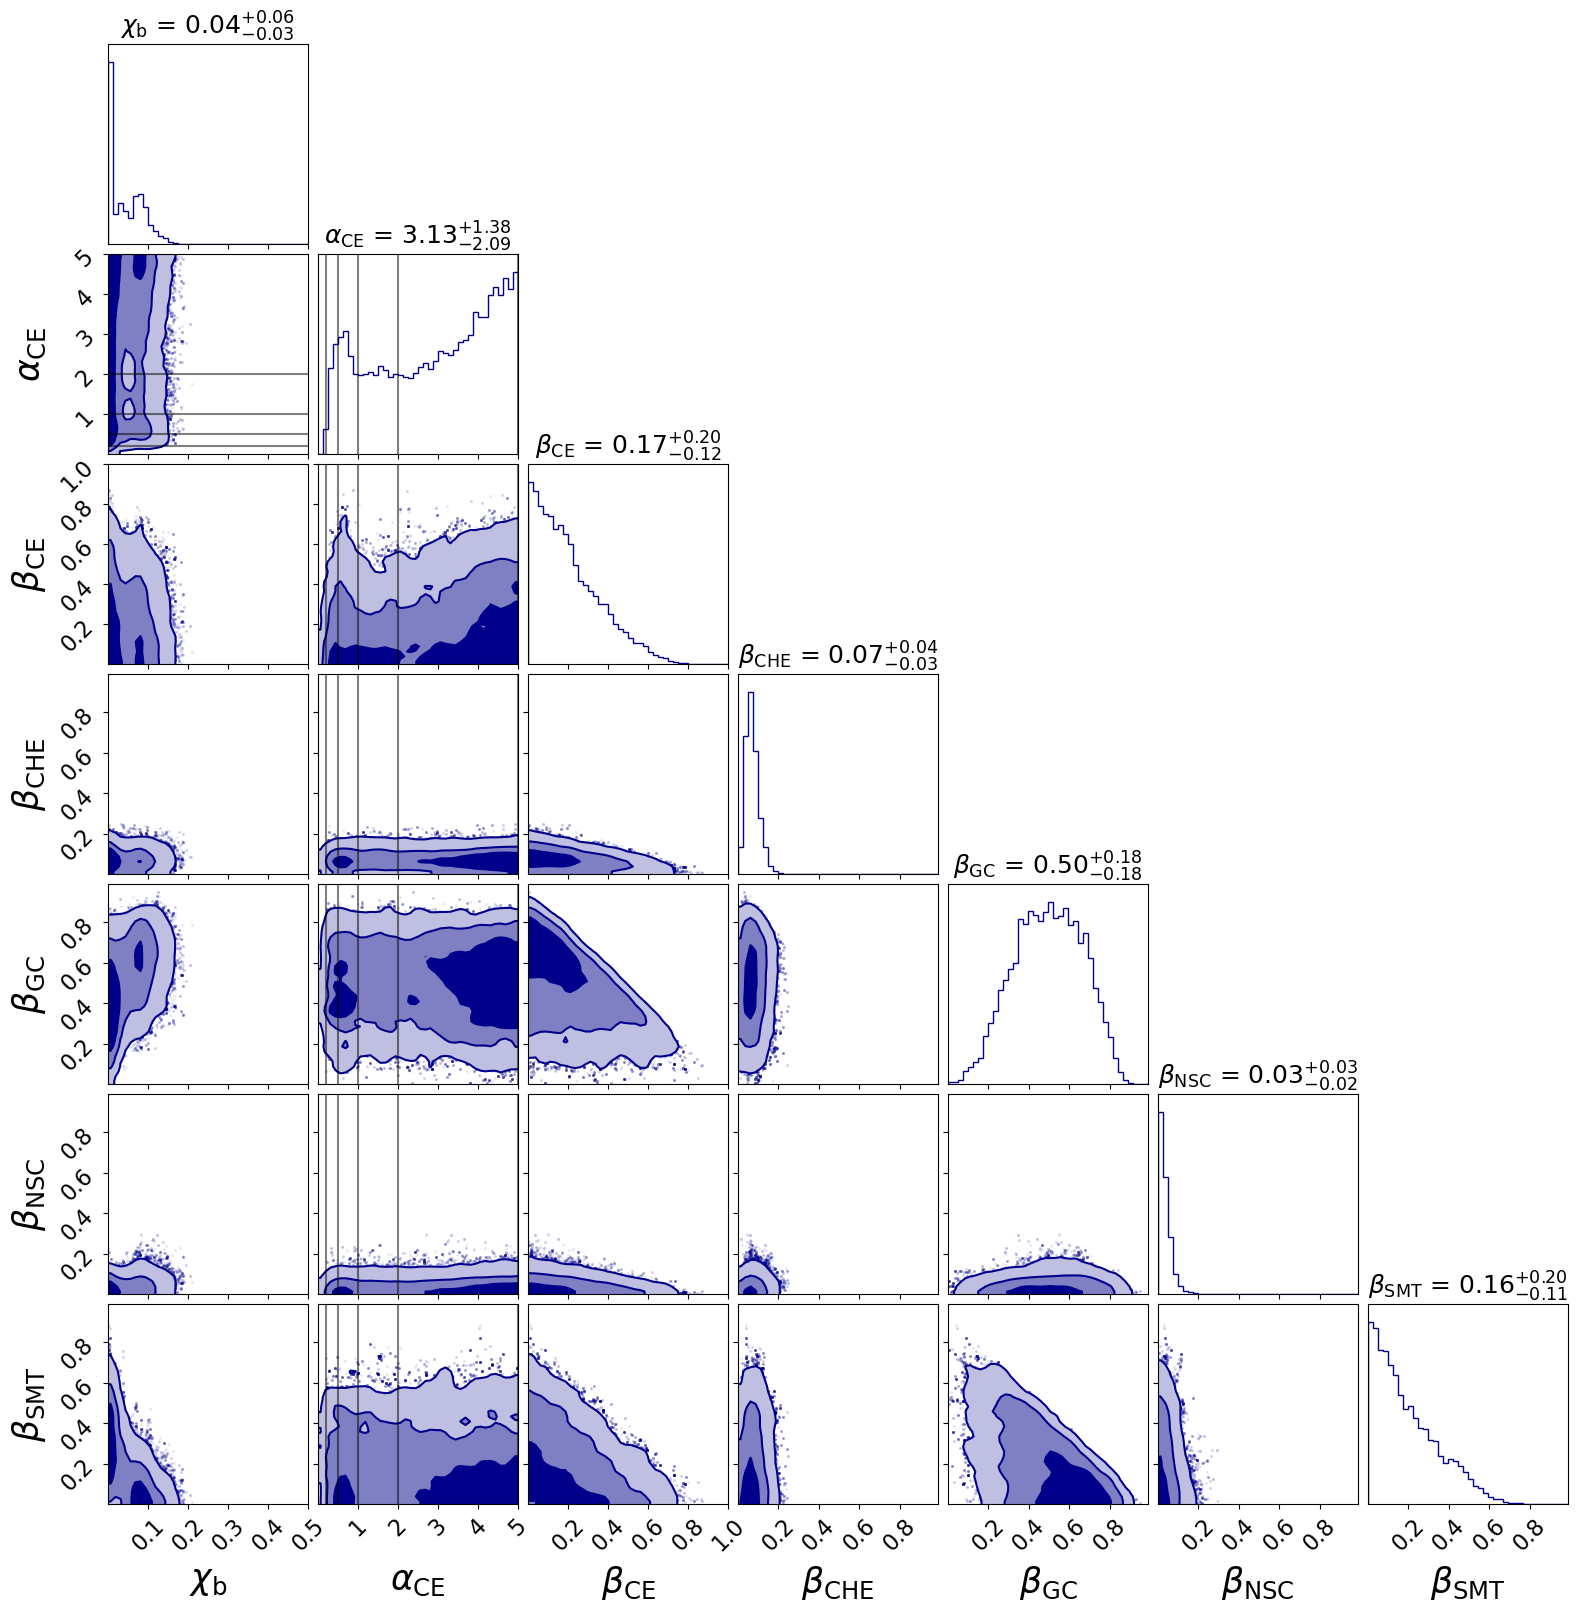

In [4]:
#corner plots of betas
plt.rcParams.update({'font.size': 16})


corner_kwargs = dict(
    bins=40,
    smooth=0.9,
    color="darkblue",
    #quantiles=[0.16, 0.84],
    levels=(1 - np.exp(-0.5), 1 - np.exp(-2), 1 - np.exp(-9 / 2.0)),
    plot_density=True,
    plot_datapoints=True,
    fill_contours=True,
    show_titles=True,
    hist_kwargs=dict(density=True),
    label_kwargs=dict(fontsize=25),
    title_kwargs=dict(fontsize=18),
    labels=[r'$\chi_\mathrm{b}$', r'$\alpha_{\mathrm{CE}}$',r'$\beta_{\mathrm{CE}}$',r'$\beta_{\mathrm{CHE}}$',r'$\beta_{\mathrm{GC}}$',r'$\beta_{\mathrm{NSC}}$',r'$\beta_{\mathrm{SMT}}$'],
    range = [(0.,.5),(0.,5.),(0.,1.),(0.,.99),(0.,.99),(0.,.99),(0.,.99)]
)

branching_fracs = np.array(flow_file['model_selection']['samples']['block0_values'])
corner.corner(branching_fracs, **corner_kwargs)

for a in alpha:
    corner.overplot_lines(fig_data, [None, a, None, None, None, None, None], color='black', alpha=0.5)
#fig_data = corner.corner(dirichlet.pdf(np.ones(5)*0.2, np.ones(5)), fig=fig_data, **corner_kwargs_kde)
#fig_data.savefig('/Users/stormcolloms/Documents/PhD/Project_work/AMAZE_model_selection/rns/Flows_200324_contcorrectalpha/plots/full_posteriors_corner_cont.pdf')

In [4]:
branching_fracs

array([[0.21371626, 1.39930394, 0.76396607, ..., 0.09372275, 0.05595897,
        0.00587857],
       [0.21371626, 1.39930394, 0.76396607, ..., 0.09372275, 0.05595897,
        0.00587857],
       [0.20898422, 1.33196896, 0.73748564, ..., 0.1048985 , 0.06374211,
        0.00393761],
       ...,
       [0.21641944, 0.89745403, 0.69898876, ..., 0.096382  , 0.07702228,
        0.01017269],
       [0.21641944, 0.89745403, 0.69898876, ..., 0.096382  , 0.07702228,
        0.01017269],
       [0.21641944, 0.89745403, 0.69898876, ..., 0.096382  , 0.07702228,
        0.01017269]])

In [5]:
glob.glob('/data/wiay/2297403c/amaze_model_select/AMAZE_model_selection/rns/Flows_300824_logsplinealphainterp/*highreg.hdf5')

['/data/wiay/2297403c/amaze_model_select/AMAZE_model_selection/rns/Flows_300824_logsplinealphainterp/output_seed89_highreg.hdf5',
 '/data/wiay/2297403c/amaze_model_select/AMAZE_model_selection/rns/Flows_300824_logsplinealphainterp/output_seed314_highreg.hdf5',
 '/data/wiay/2297403c/amaze_model_select/AMAZE_model_selection/rns/Flows_300824_logsplinealphainterp/output_highreg.hdf5',
 '/data/wiay/2297403c/amaze_model_select/AMAZE_model_selection/rns/Flows_300824_logsplinealphainterp/output_seed12_highreg.hdf5']

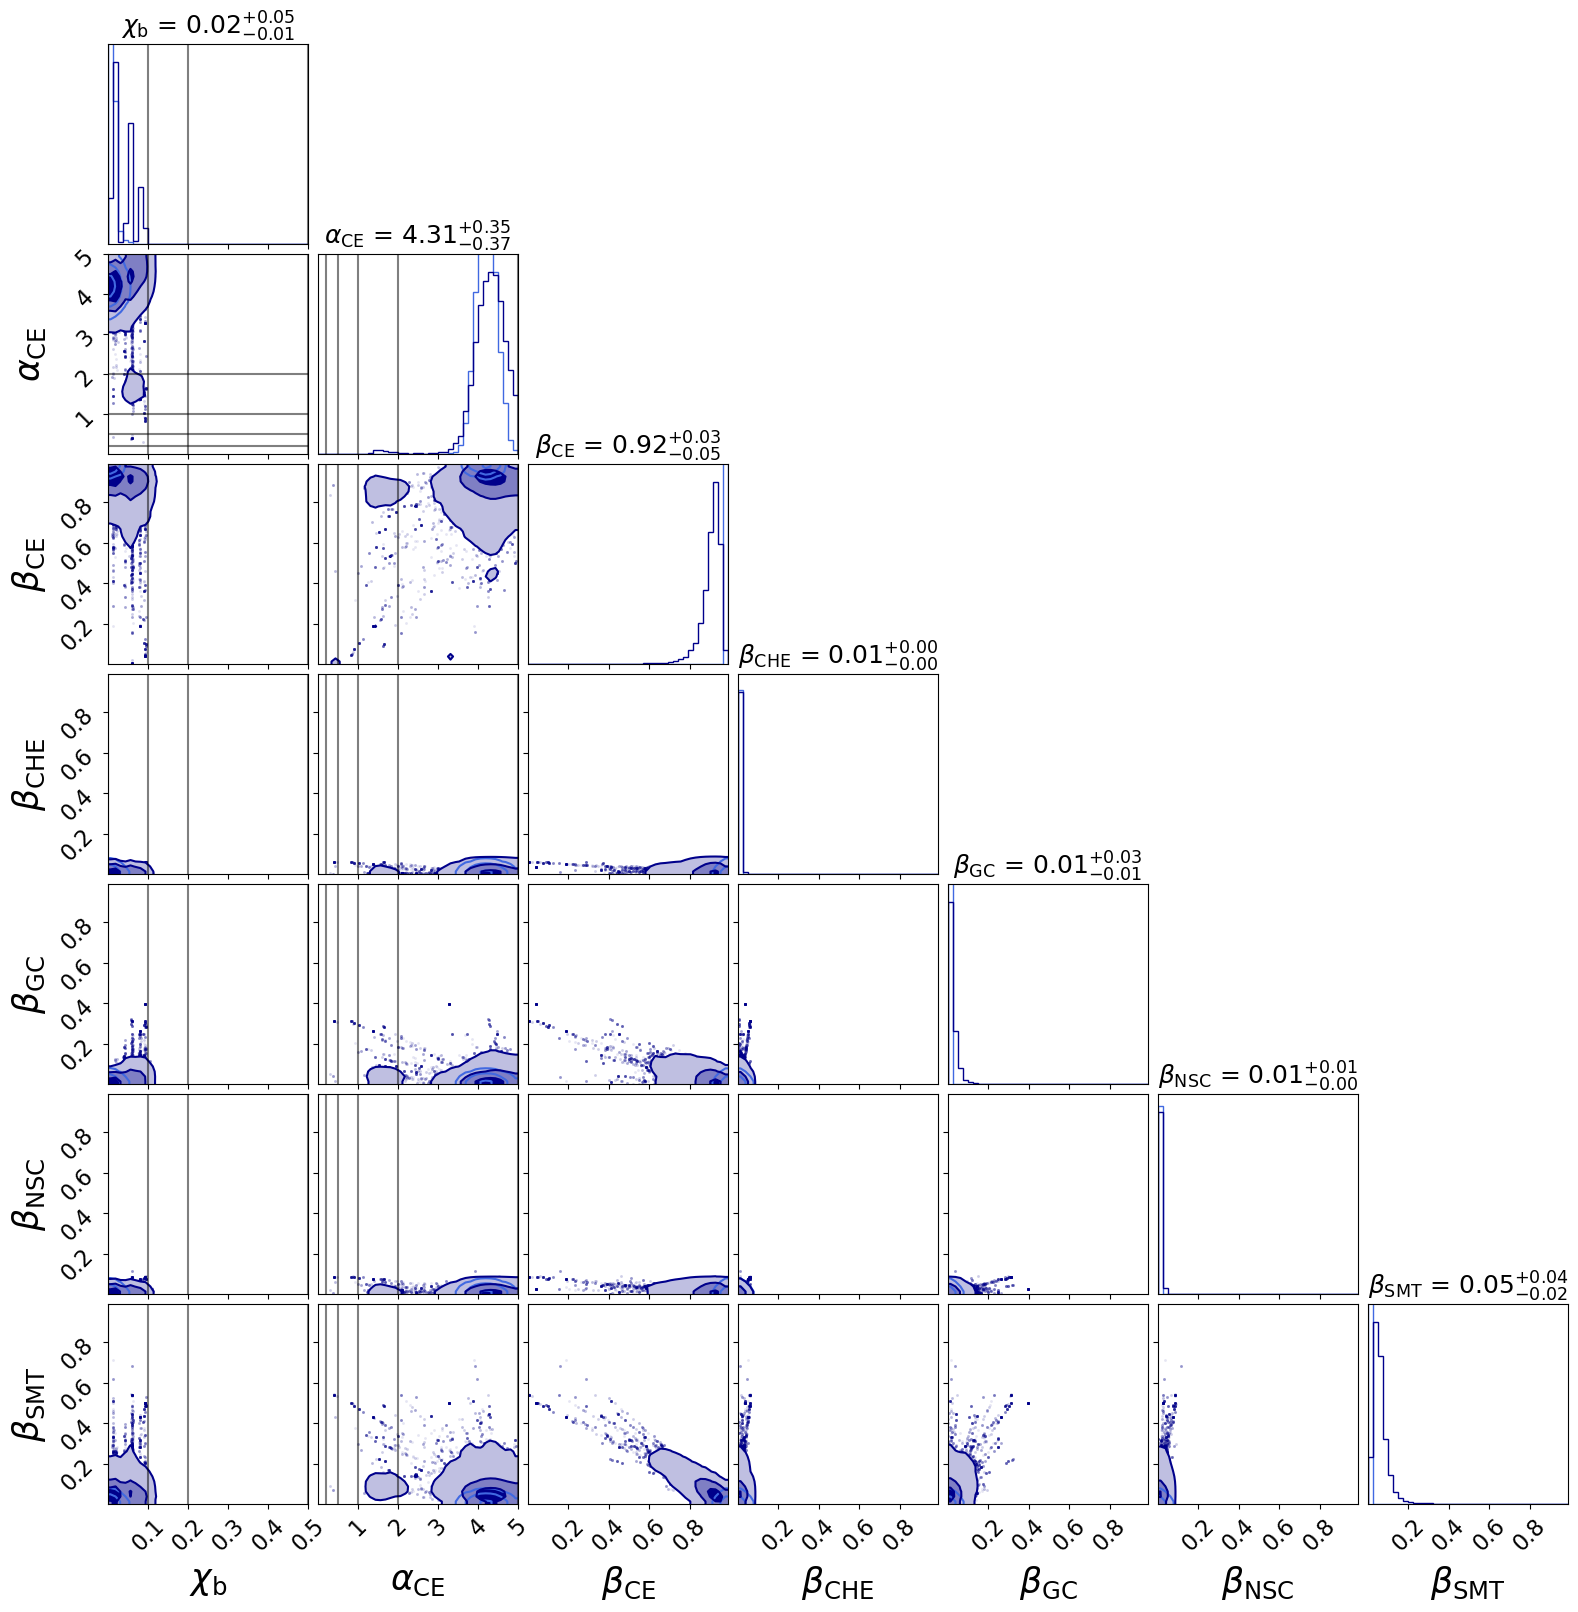

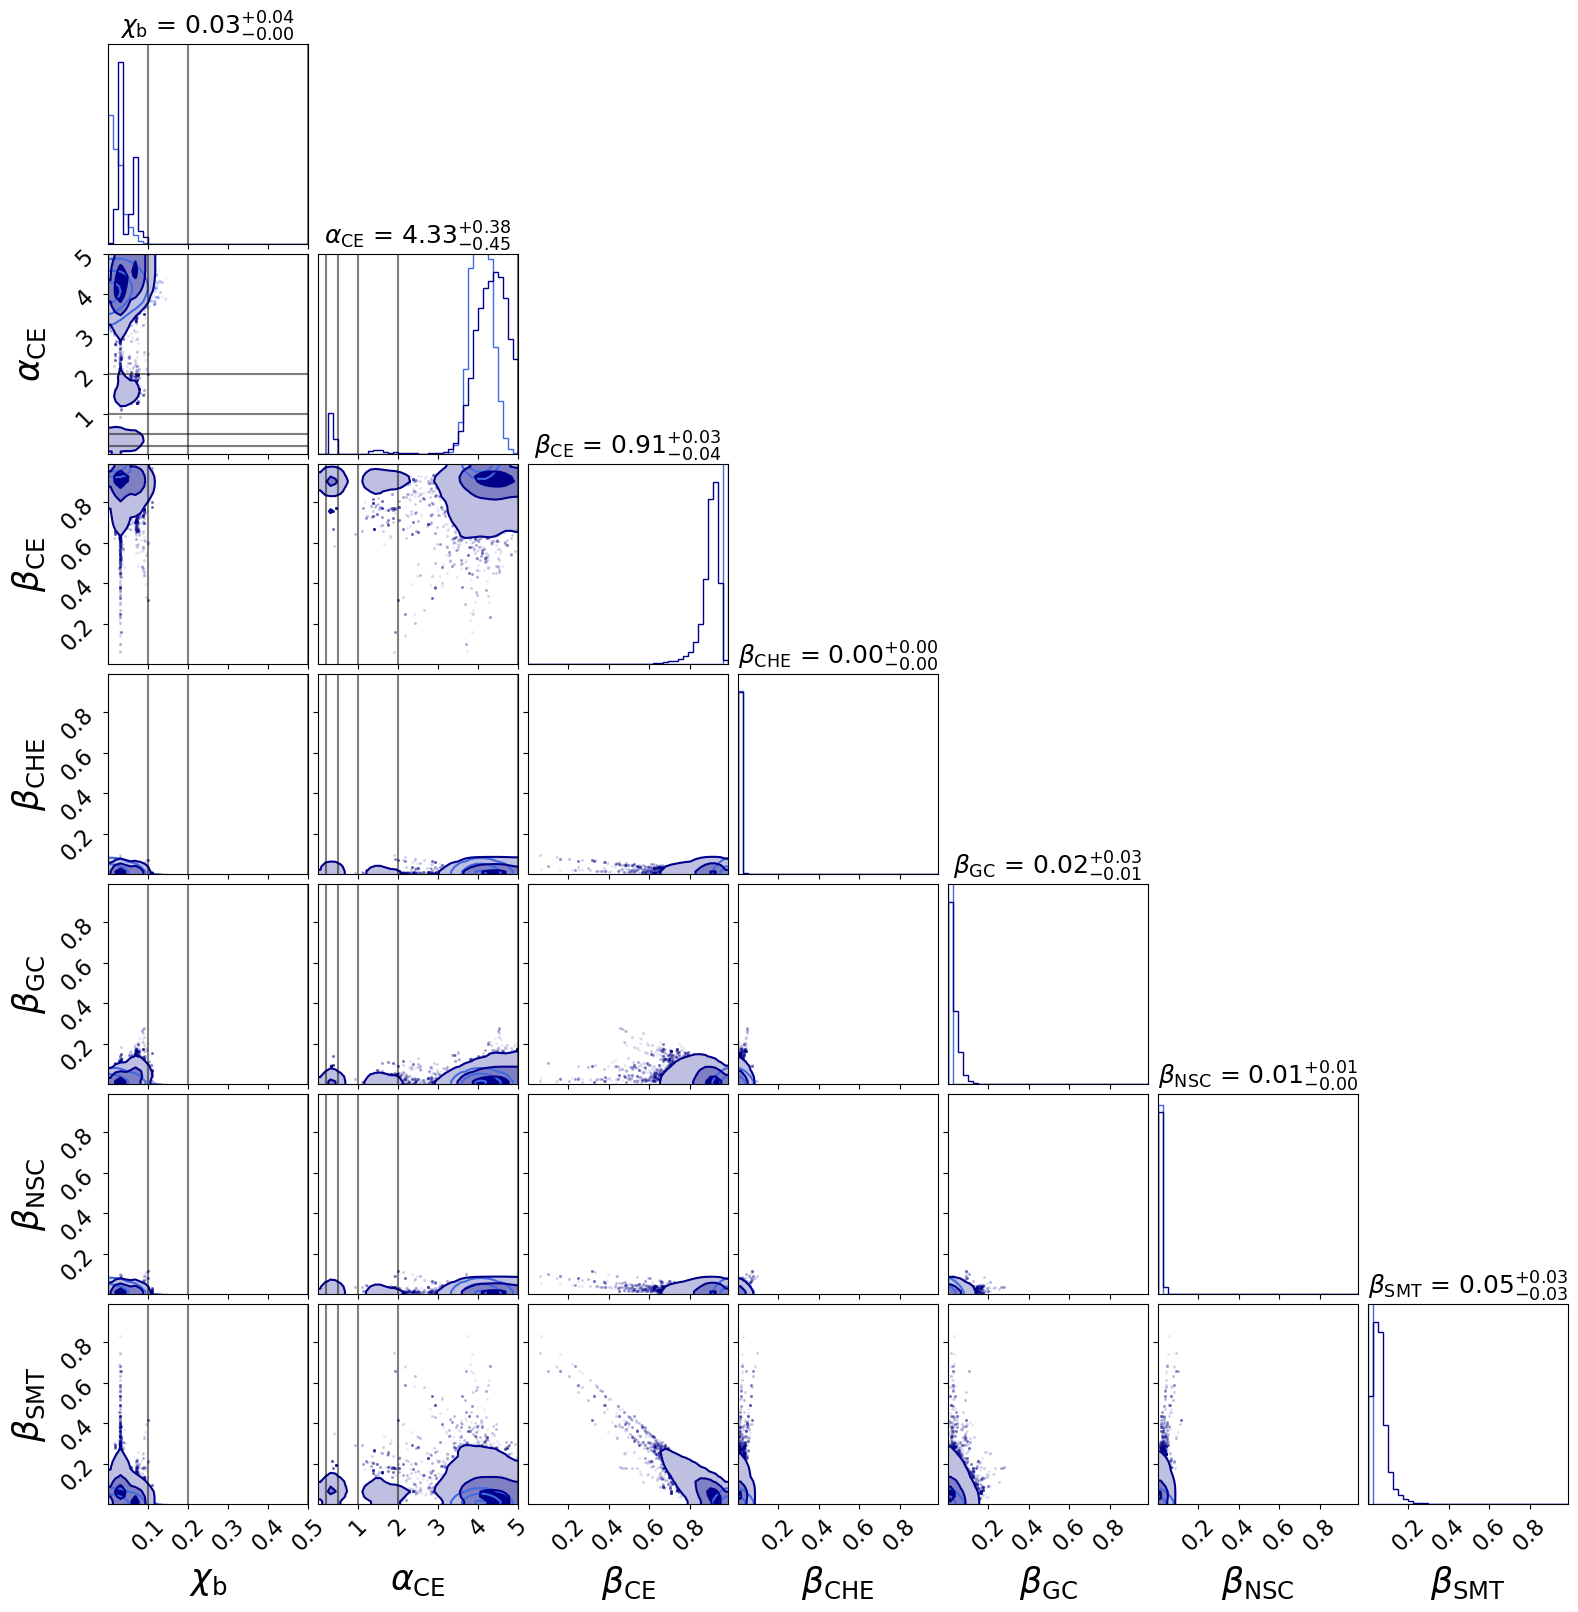

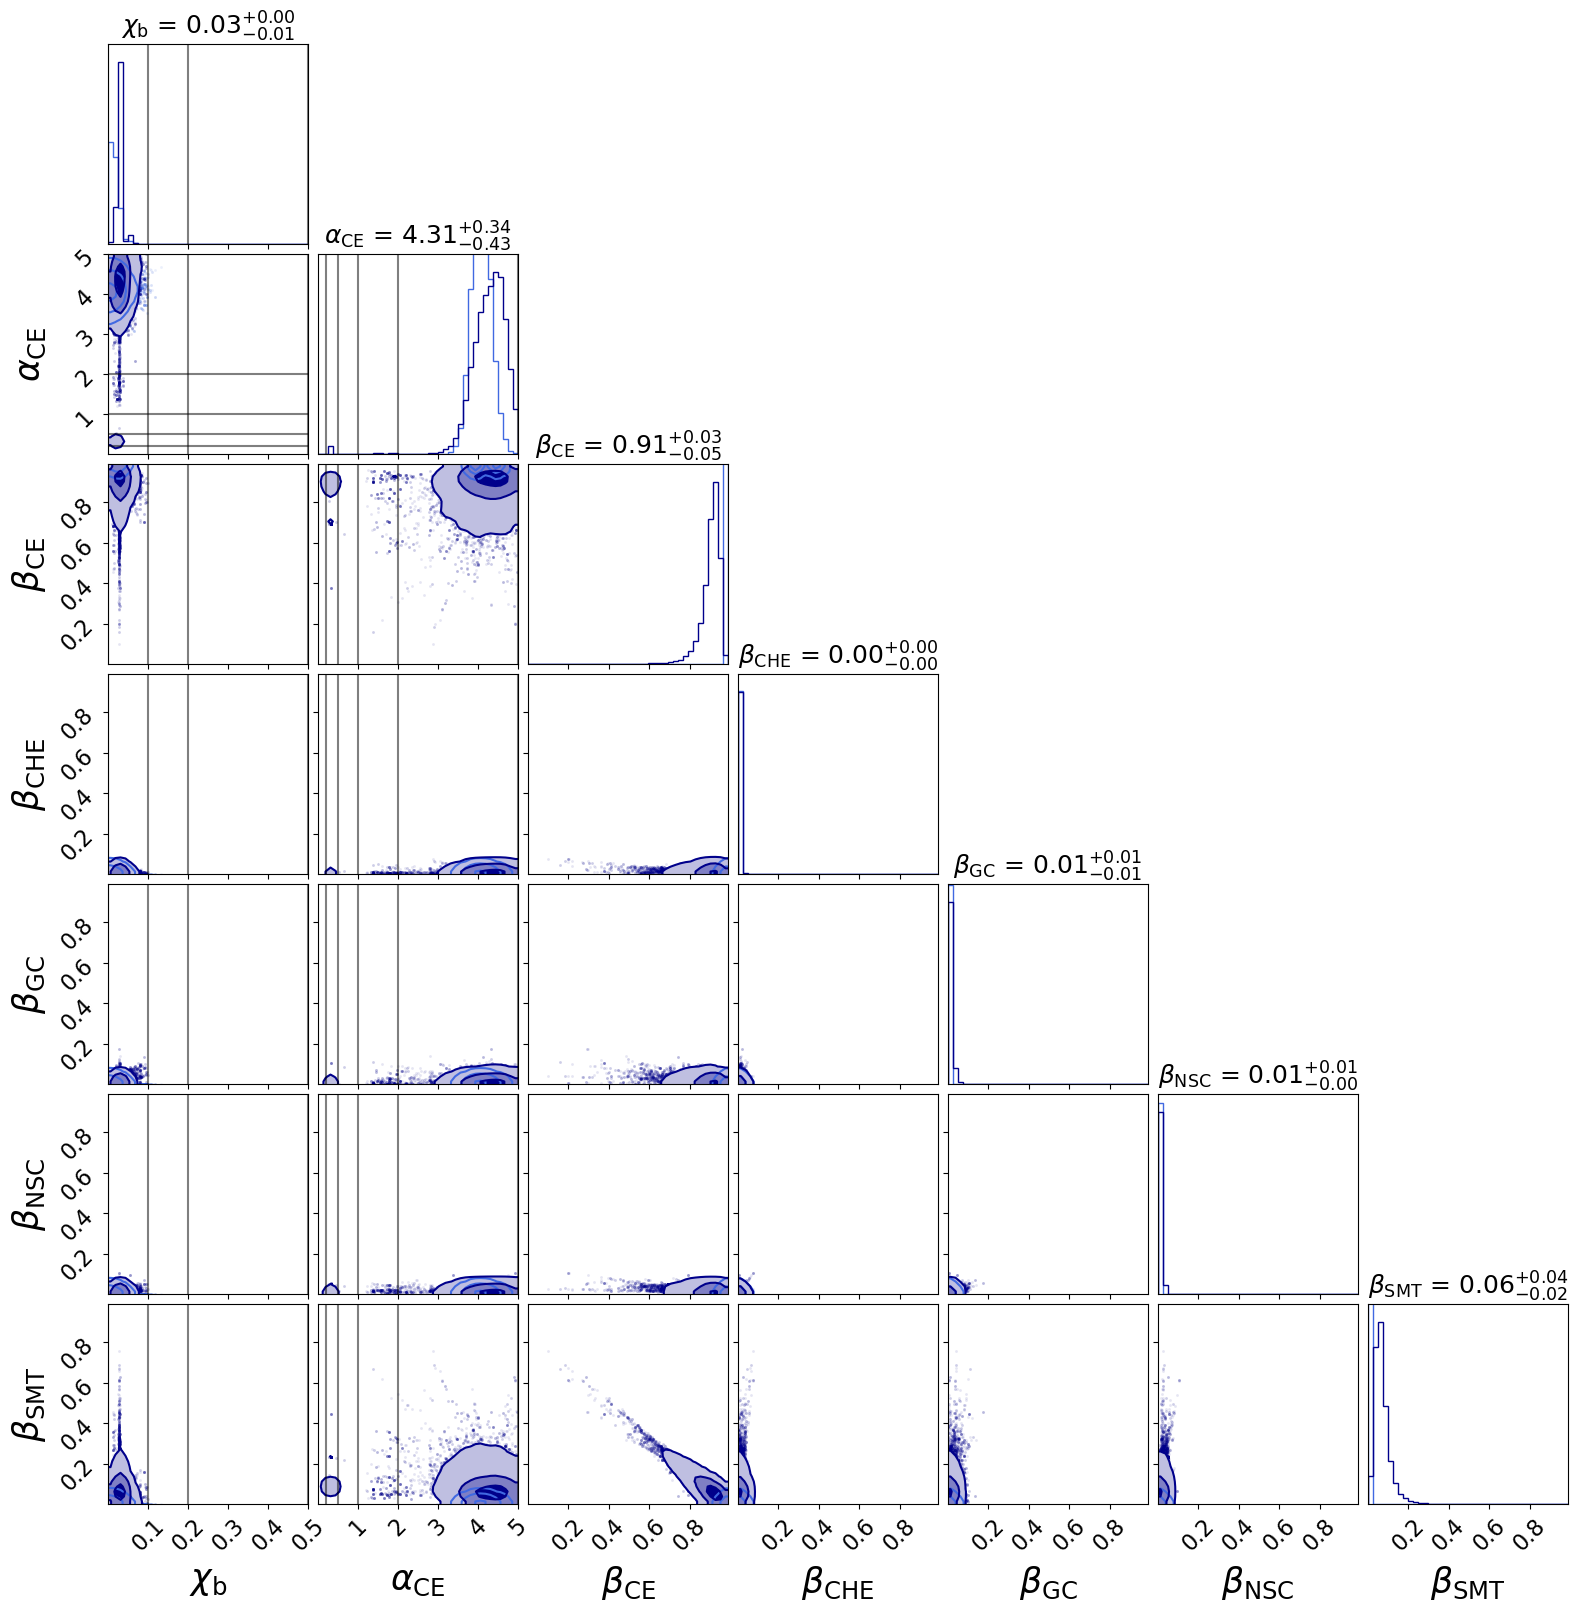

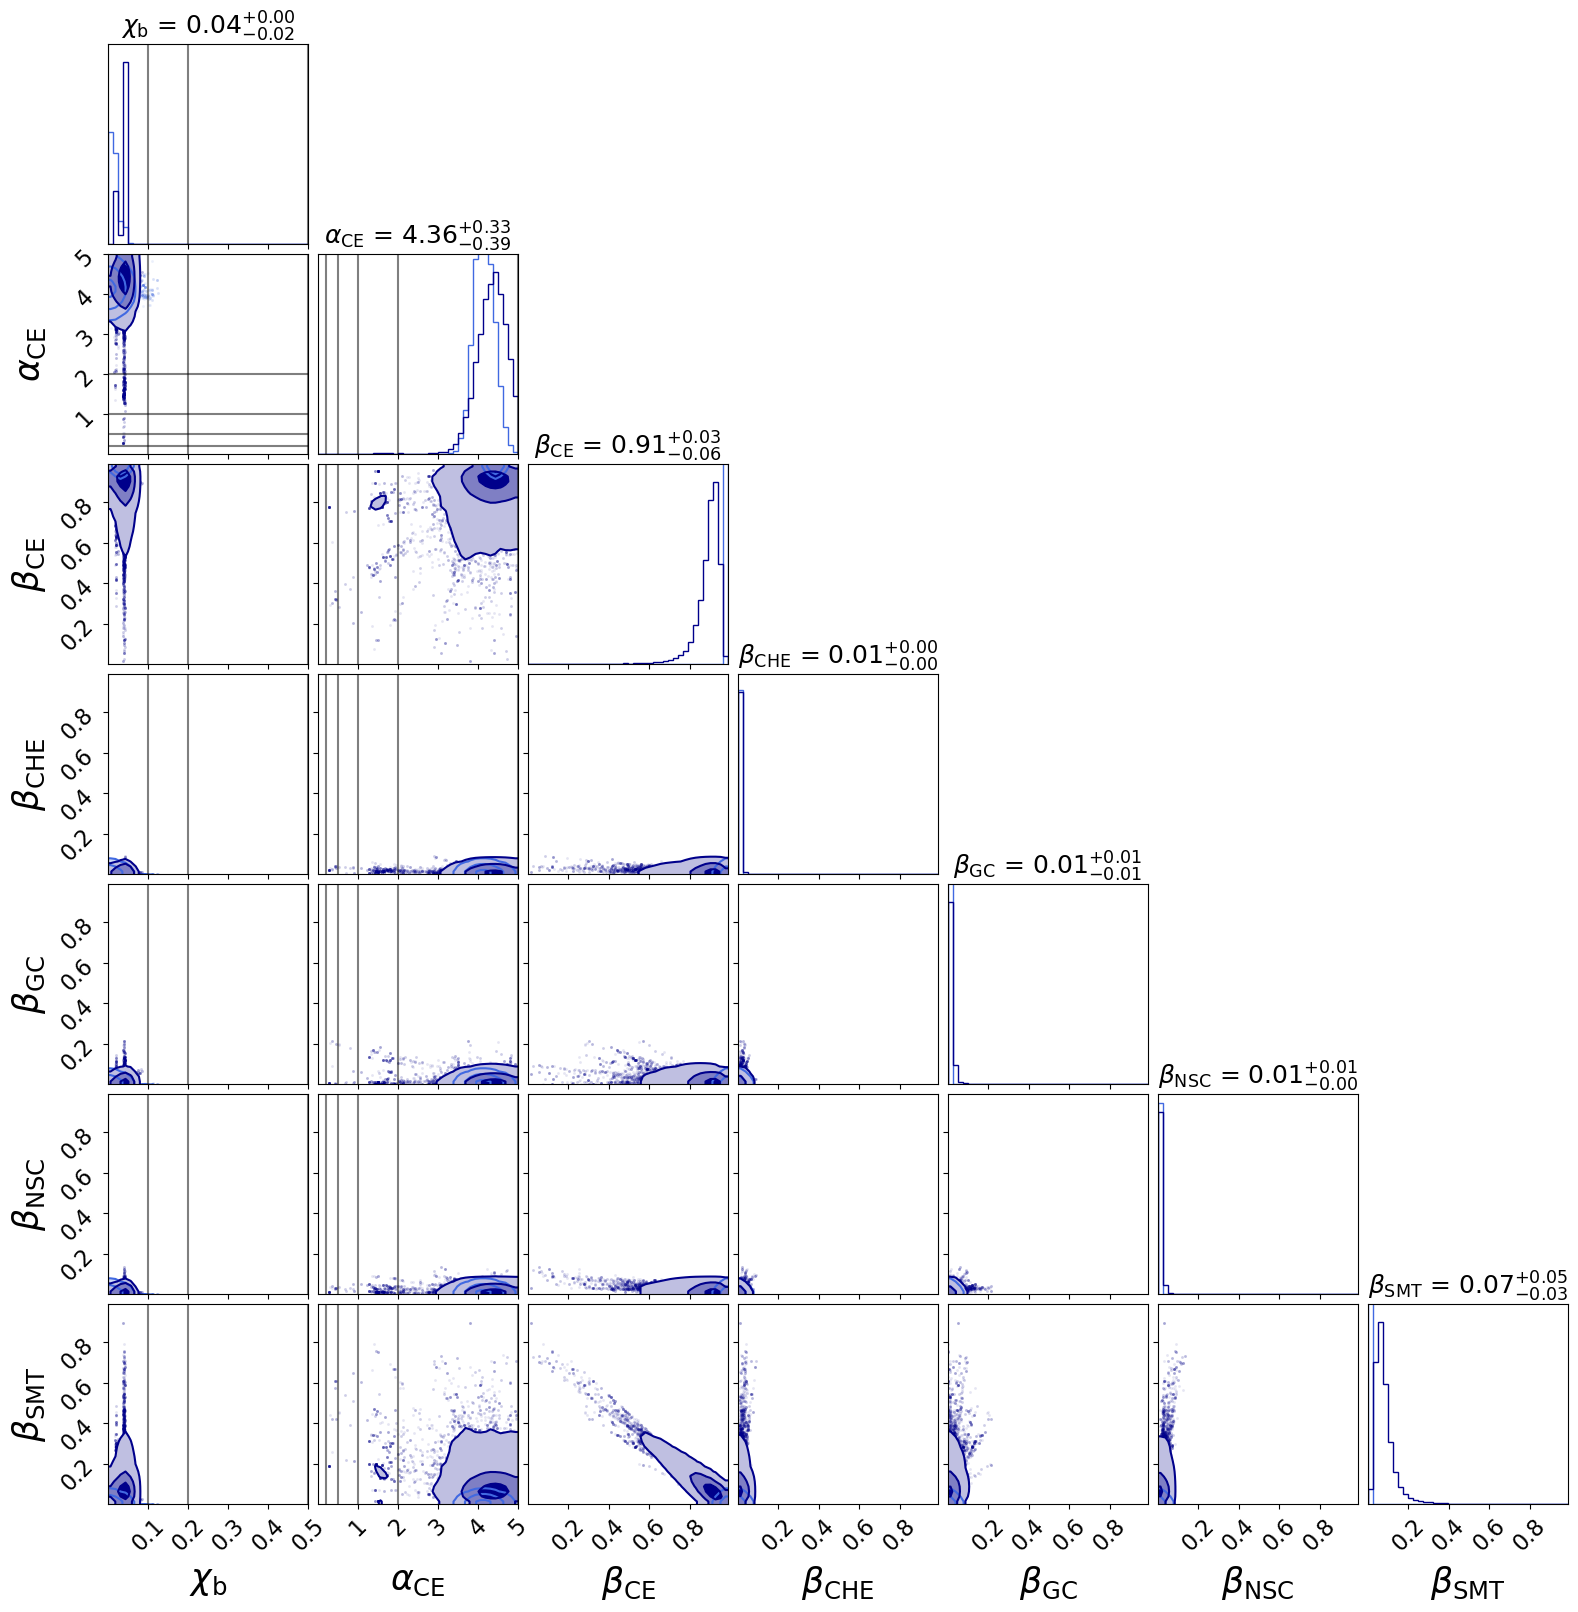

In [7]:
#corner plots of betas
plt.rcParams.update({'font.size': 16})


corner_kwargs = dict(
    bins=40,
    smooth=0.9,
    color="royalblue",
    #quantiles=[0.16, 0.84],
    levels=(1 - np.exp(-0.5), 1 - np.exp(-2), 1 - np.exp(-9 / 2.0)),
    plot_density=True,
    plot_datapoints=True,
    fill_contours=True,
    show_titles=True,
    hist_kwargs=dict(density=True),
    label_kwargs=dict(fontsize=25),
    title_kwargs=dict(fontsize=18),
    labels=[r'$\chi_\mathrm{b}$', r'$\alpha_{\mathrm{CE}}$',r'$\beta_{\mathrm{CE}}$',r'$\beta_{\mathrm{CHE}}$',r'$\beta_{\mathrm{GC}}$',r'$\beta_{\mathrm{NSC}}$',r'$\beta_{\mathrm{SMT}}$'],
    range = [(0.,.5),(0.,5.),(0.,.99),(0.,.99),(0.,.99),(0.,.99),(0.,.99)]
)
kwargs_lowreg = dict(
    bins=40,
    smooth=0.9,
    color="darkblue",
    #quantiles=[0.16, 0.84],
    levels=(1 - np.exp(-0.5), 1 - np.exp(-2), 1 - np.exp(-9 / 2.0)),
    plot_density=True,
    plot_datapoints=True,
    fill_contours=True,
    show_titles=True,
    hist_kwargs=dict(density=True),
    label_kwargs=dict(fontsize=25),
    title_kwargs=dict(fontsize=18),
    labels=[r'$\chi_\mathrm{b}$', r'$\alpha_{\mathrm{CE}}$',r'$\beta_{\mathrm{CE}}$',r'$\beta_{\mathrm{CHE}}$',r'$\beta_{\mathrm{GC}}$',r'$\beta_{\mathrm{NSC}}$',r'$\beta_{\mathrm{SMT}}$'],
    range = [(0.,.5),(0.,5.),(0.,.99),(0.,.99),(0.,.99),(0.,.99),(0.,.99)]
)


files_lowreg = [
 'Flows_300824_logsplinealphainterp/output_seed89.hdf5',
 'Flows_300824_logsplinealphainterp/output_seed314.hdf5',
 'Flows_300824_logsplinealphainterp/output.hdf5',
 'Flows_300824_logsplinealphainterp/output_seed12.hdf5']

for i, filename in enumerate(glob.glob('/data/wiay/2297403c/amaze_model_select/AMAZE_model_selection/rns/Flows_300824_logsplinealphainterp/*_highreg.hdf5')):

    file = h5py.File(filename, 'r')
    file_lowreg = h5py.File(f'/data/wiay/2297403c/amaze_model_select/AMAZE_model_selection/rns/{files_lowreg[i]}', 'r')
    branching_fracs = np.array(file['model_selection']['samples']['block0_values'])
    fig_seed = corner.corner(branching_fracs, **corner_kwargs)

    branching_fracs_lowreg = np.array(file_lowreg['model_selection']['samples']['block0_values'])
    corner.corner(branching_fracs_lowreg, fig=fig_seed, **kwargs_lowreg)

    for xb in chi_b:
        corner.overplot_lines(fig_seed, [xb, None, None, None, None, None, None], color='black', alpha=0.5)

    for a in alpha:
        corner.overplot_lines(fig_seed, [None, a, None, None, None, None, None], color='black', alpha=0.5)

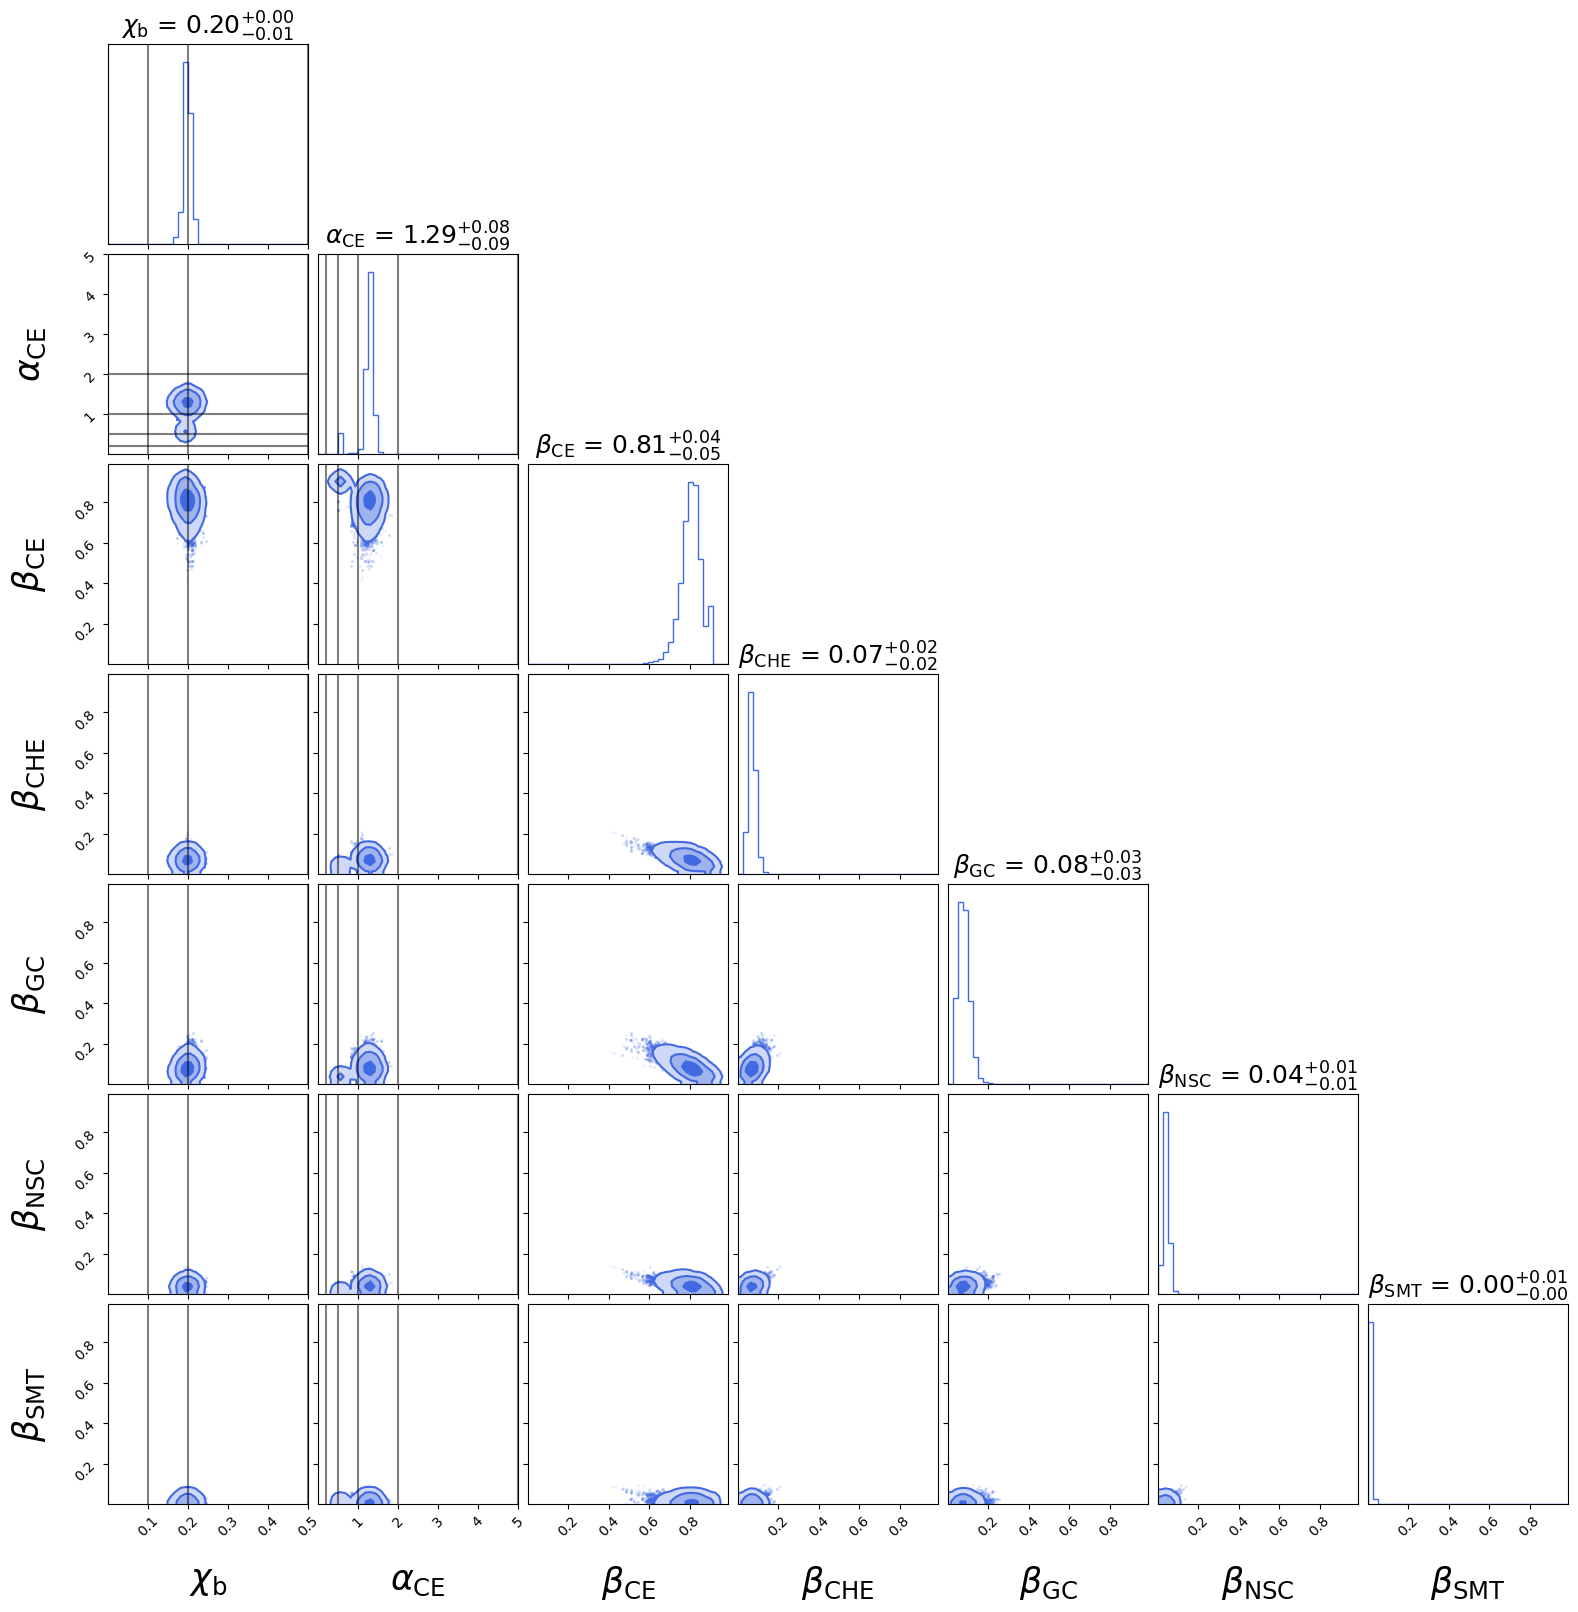

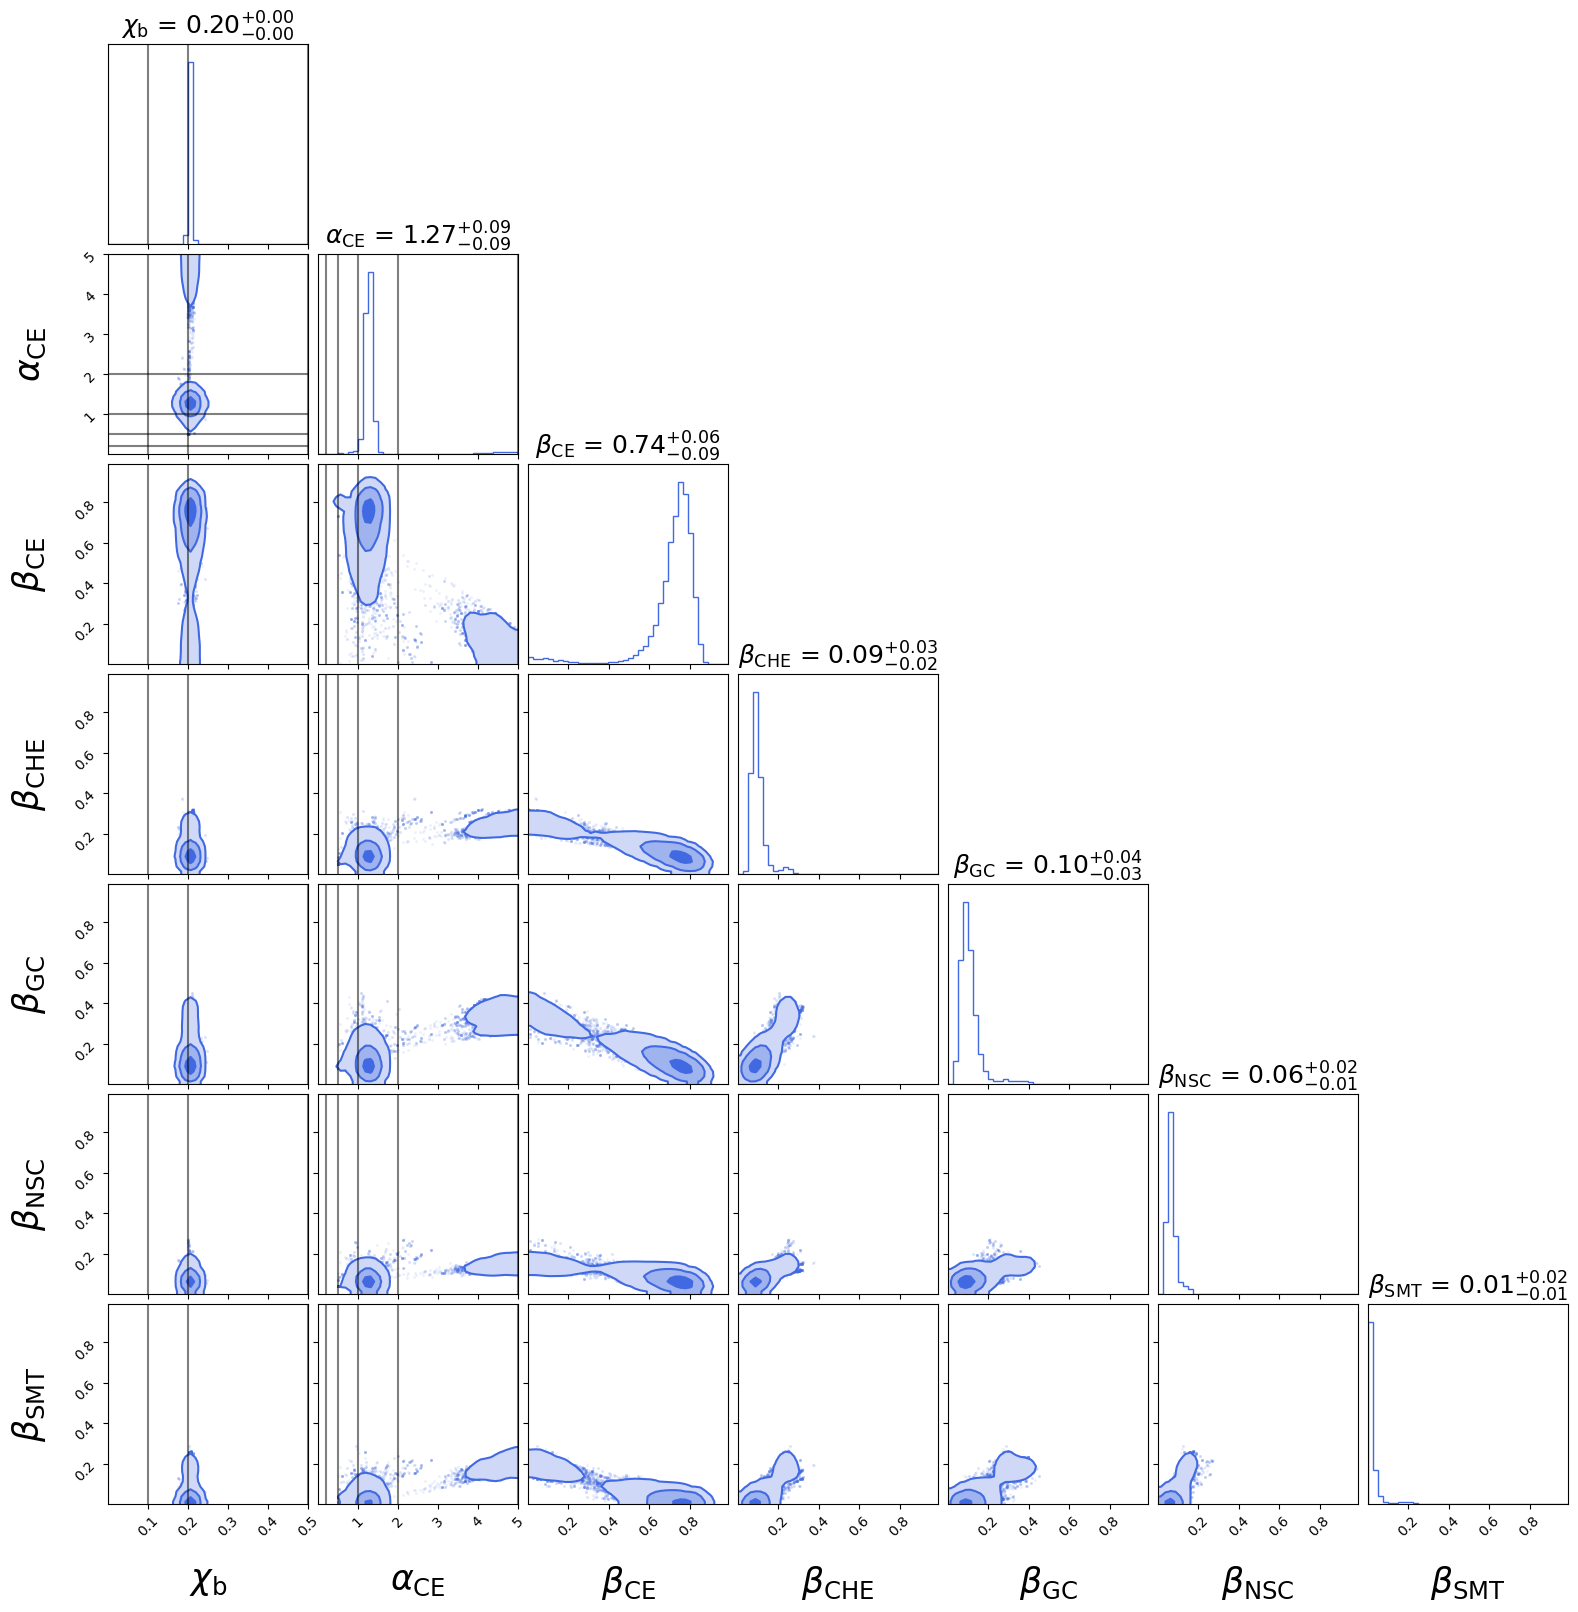

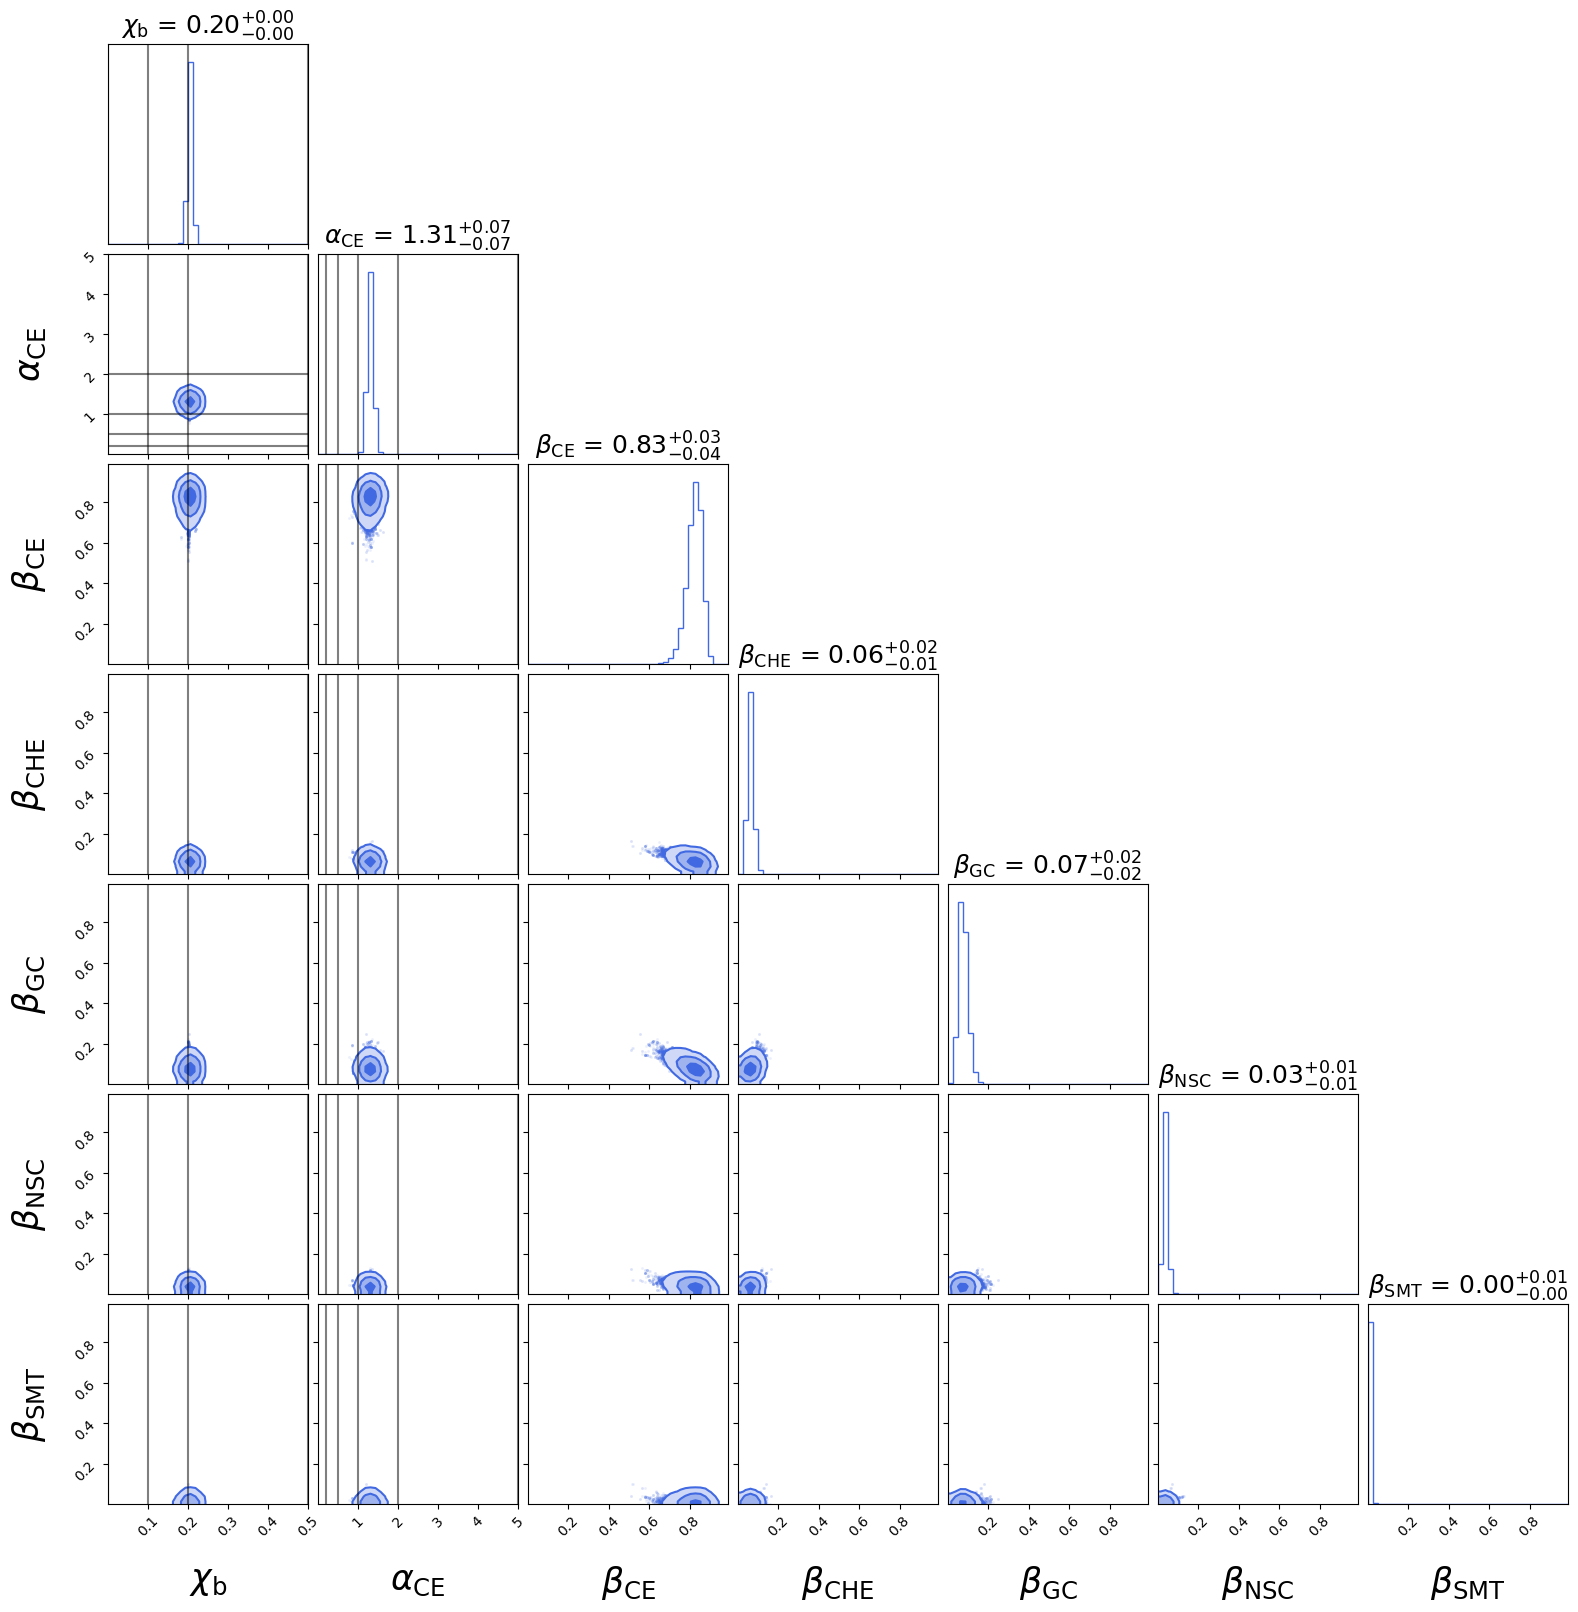

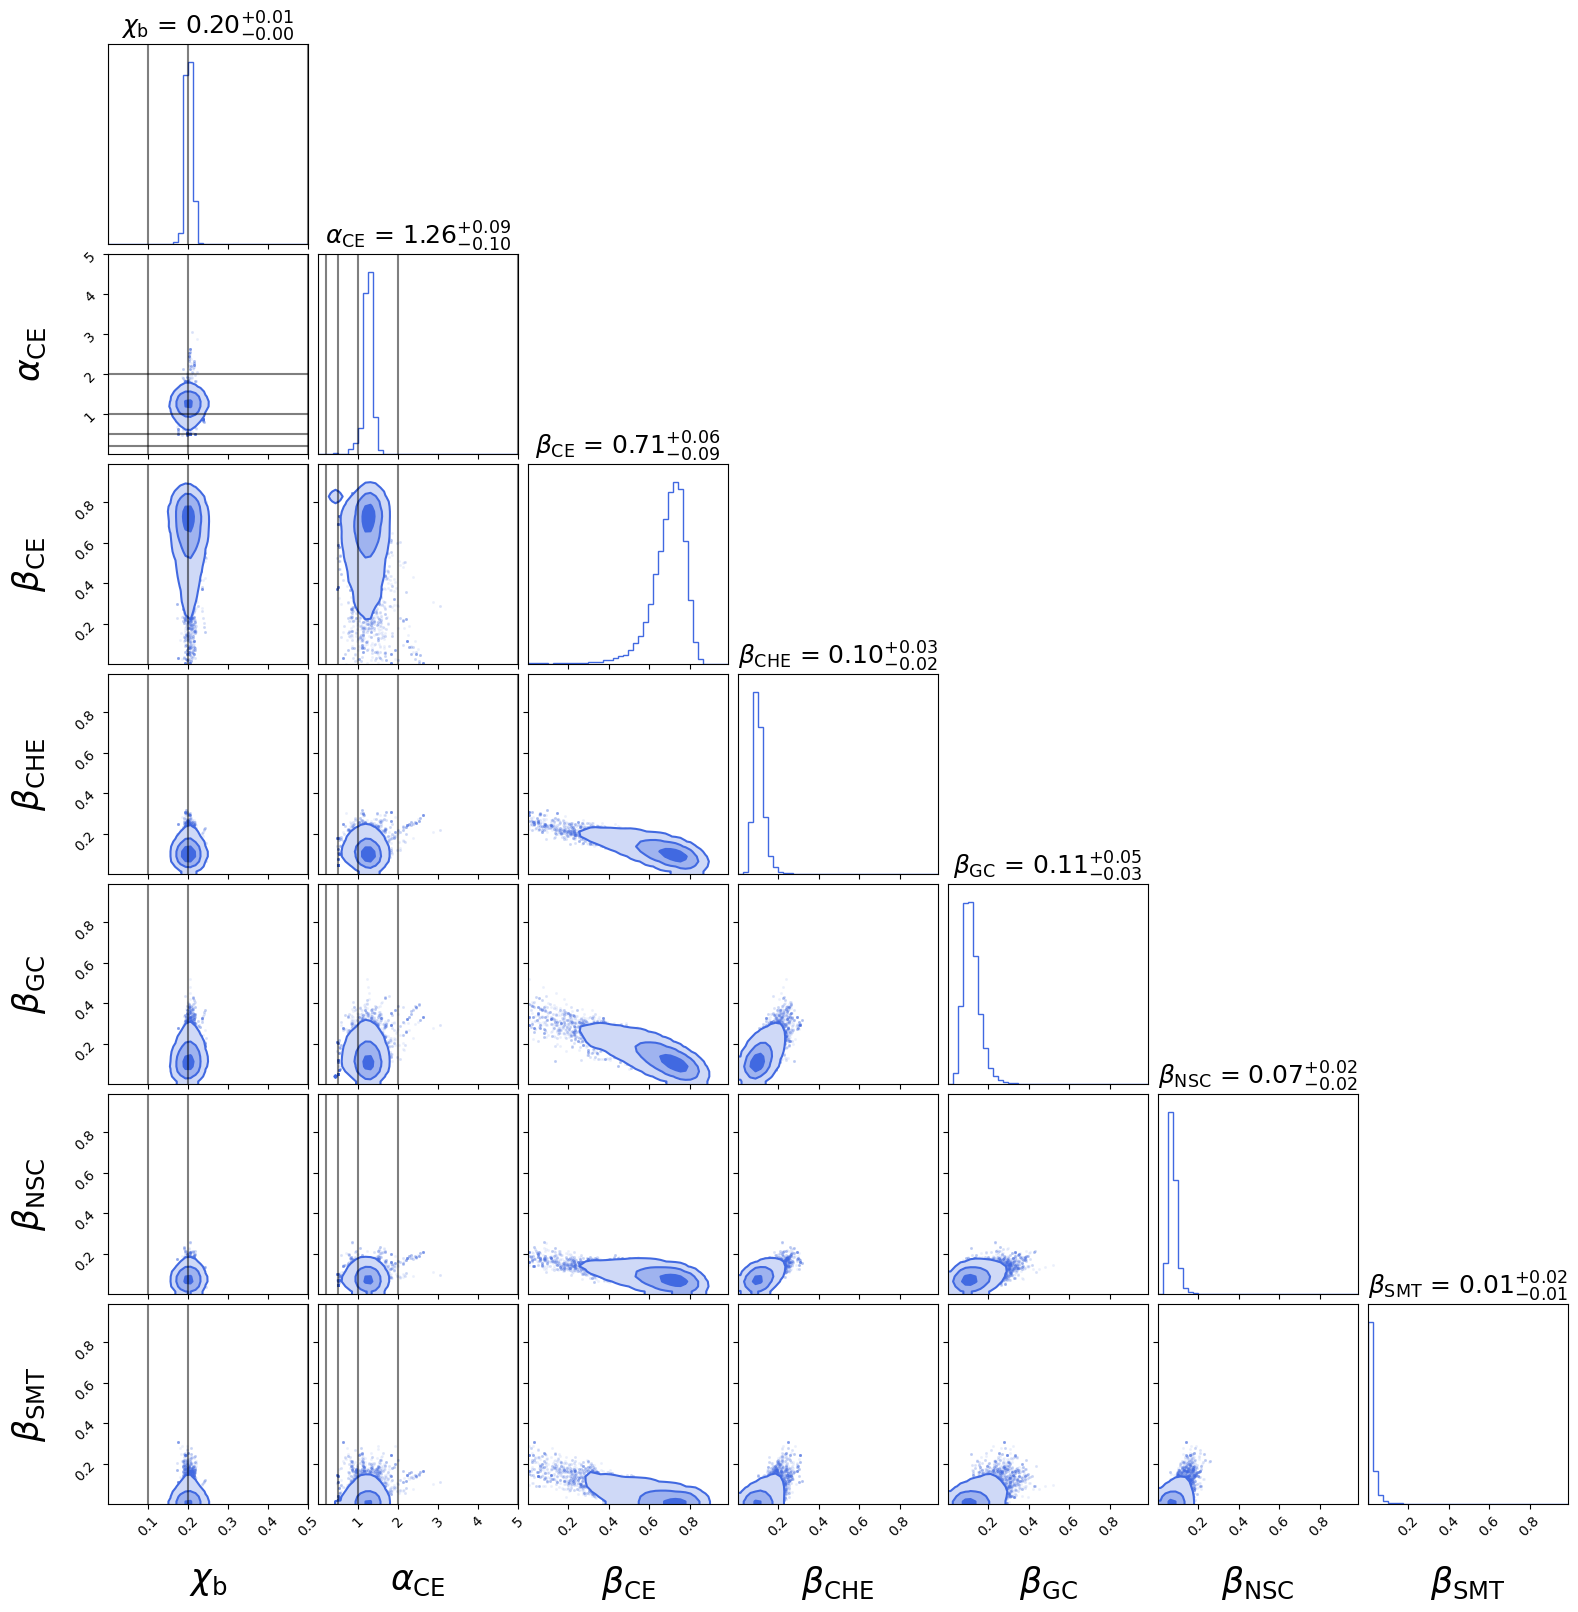

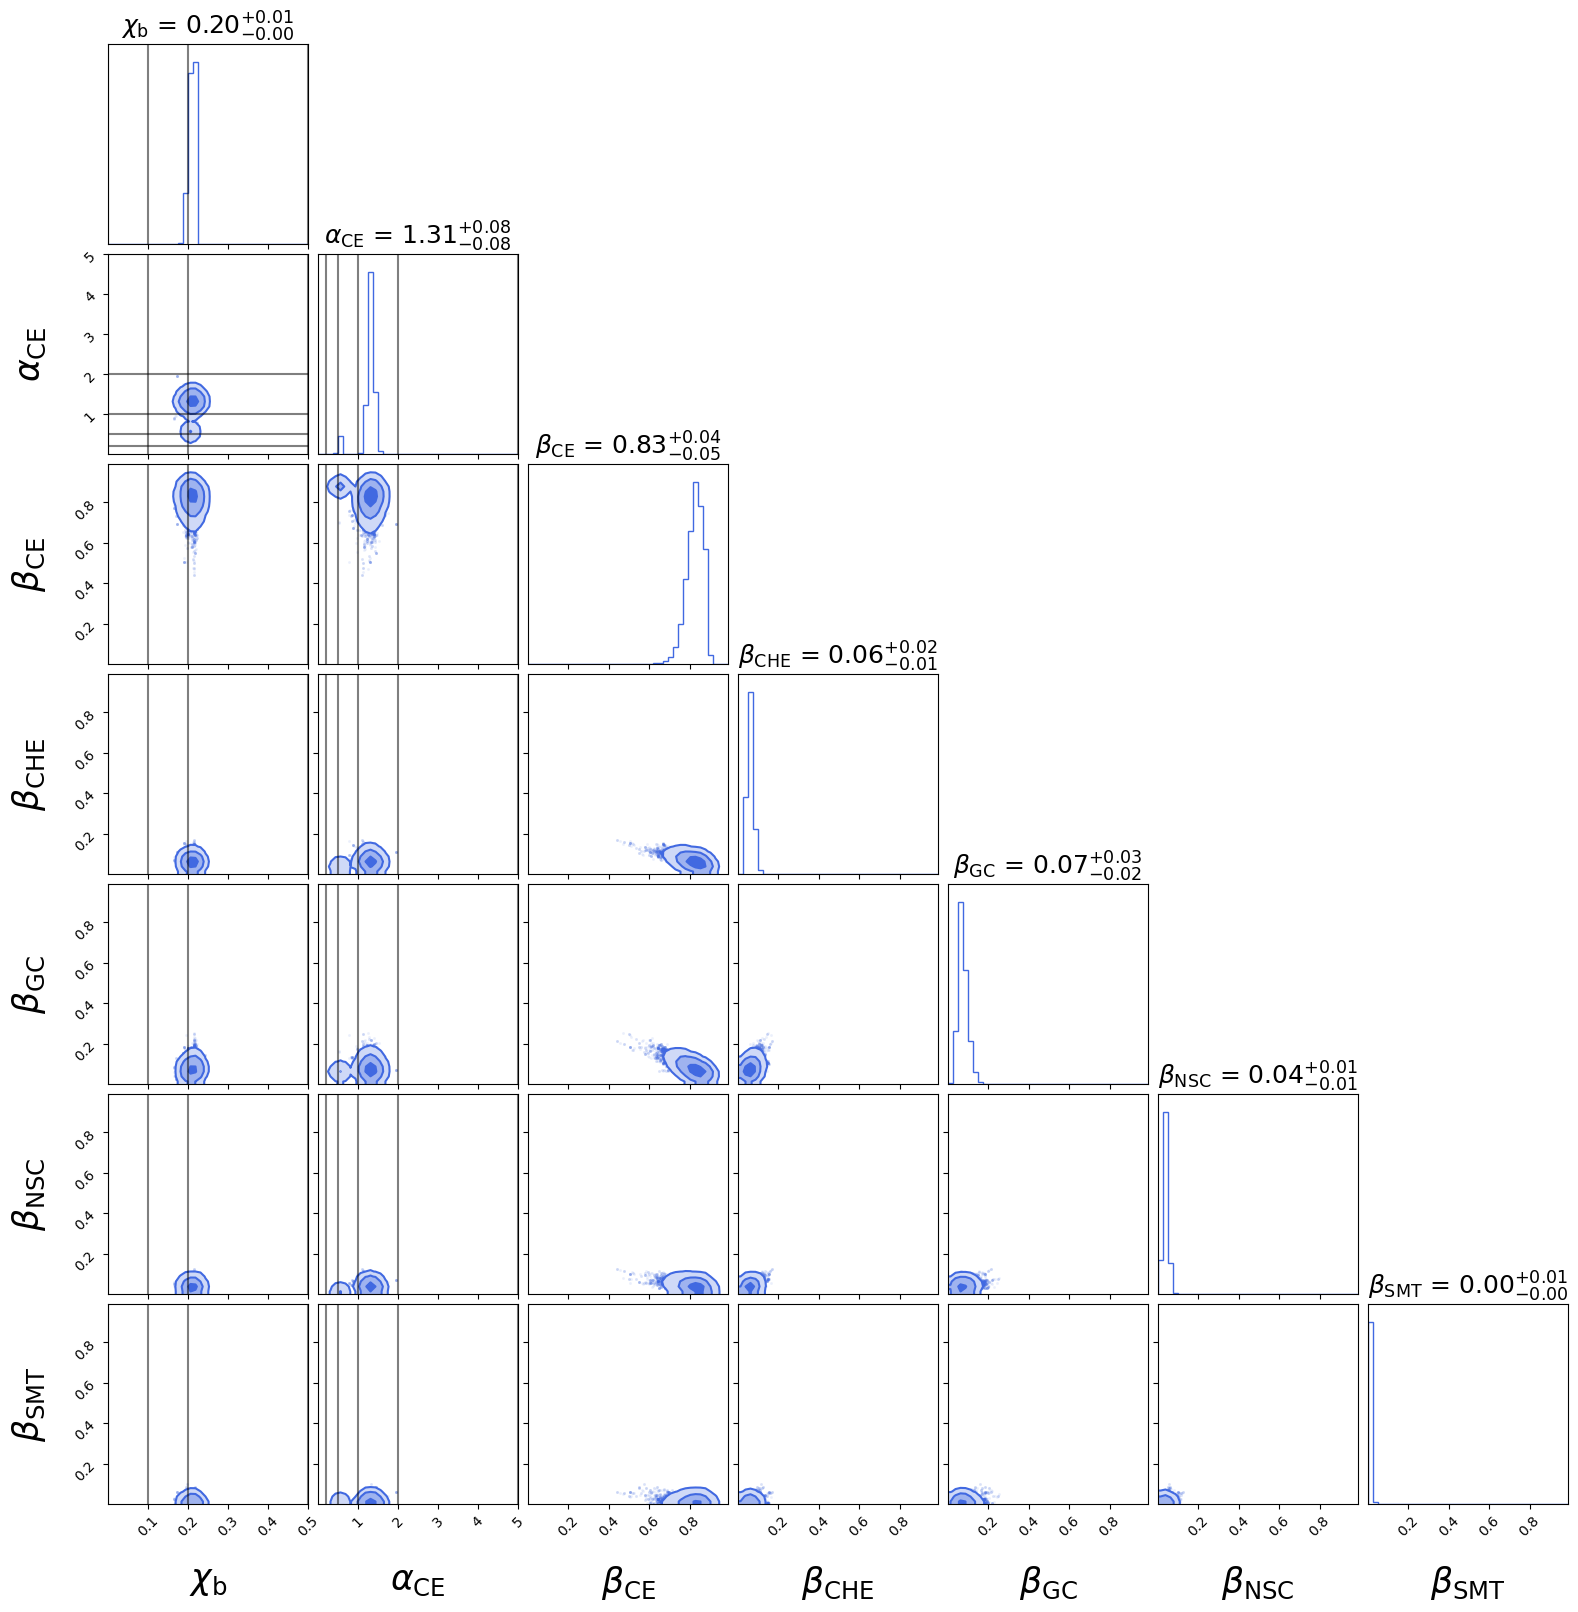

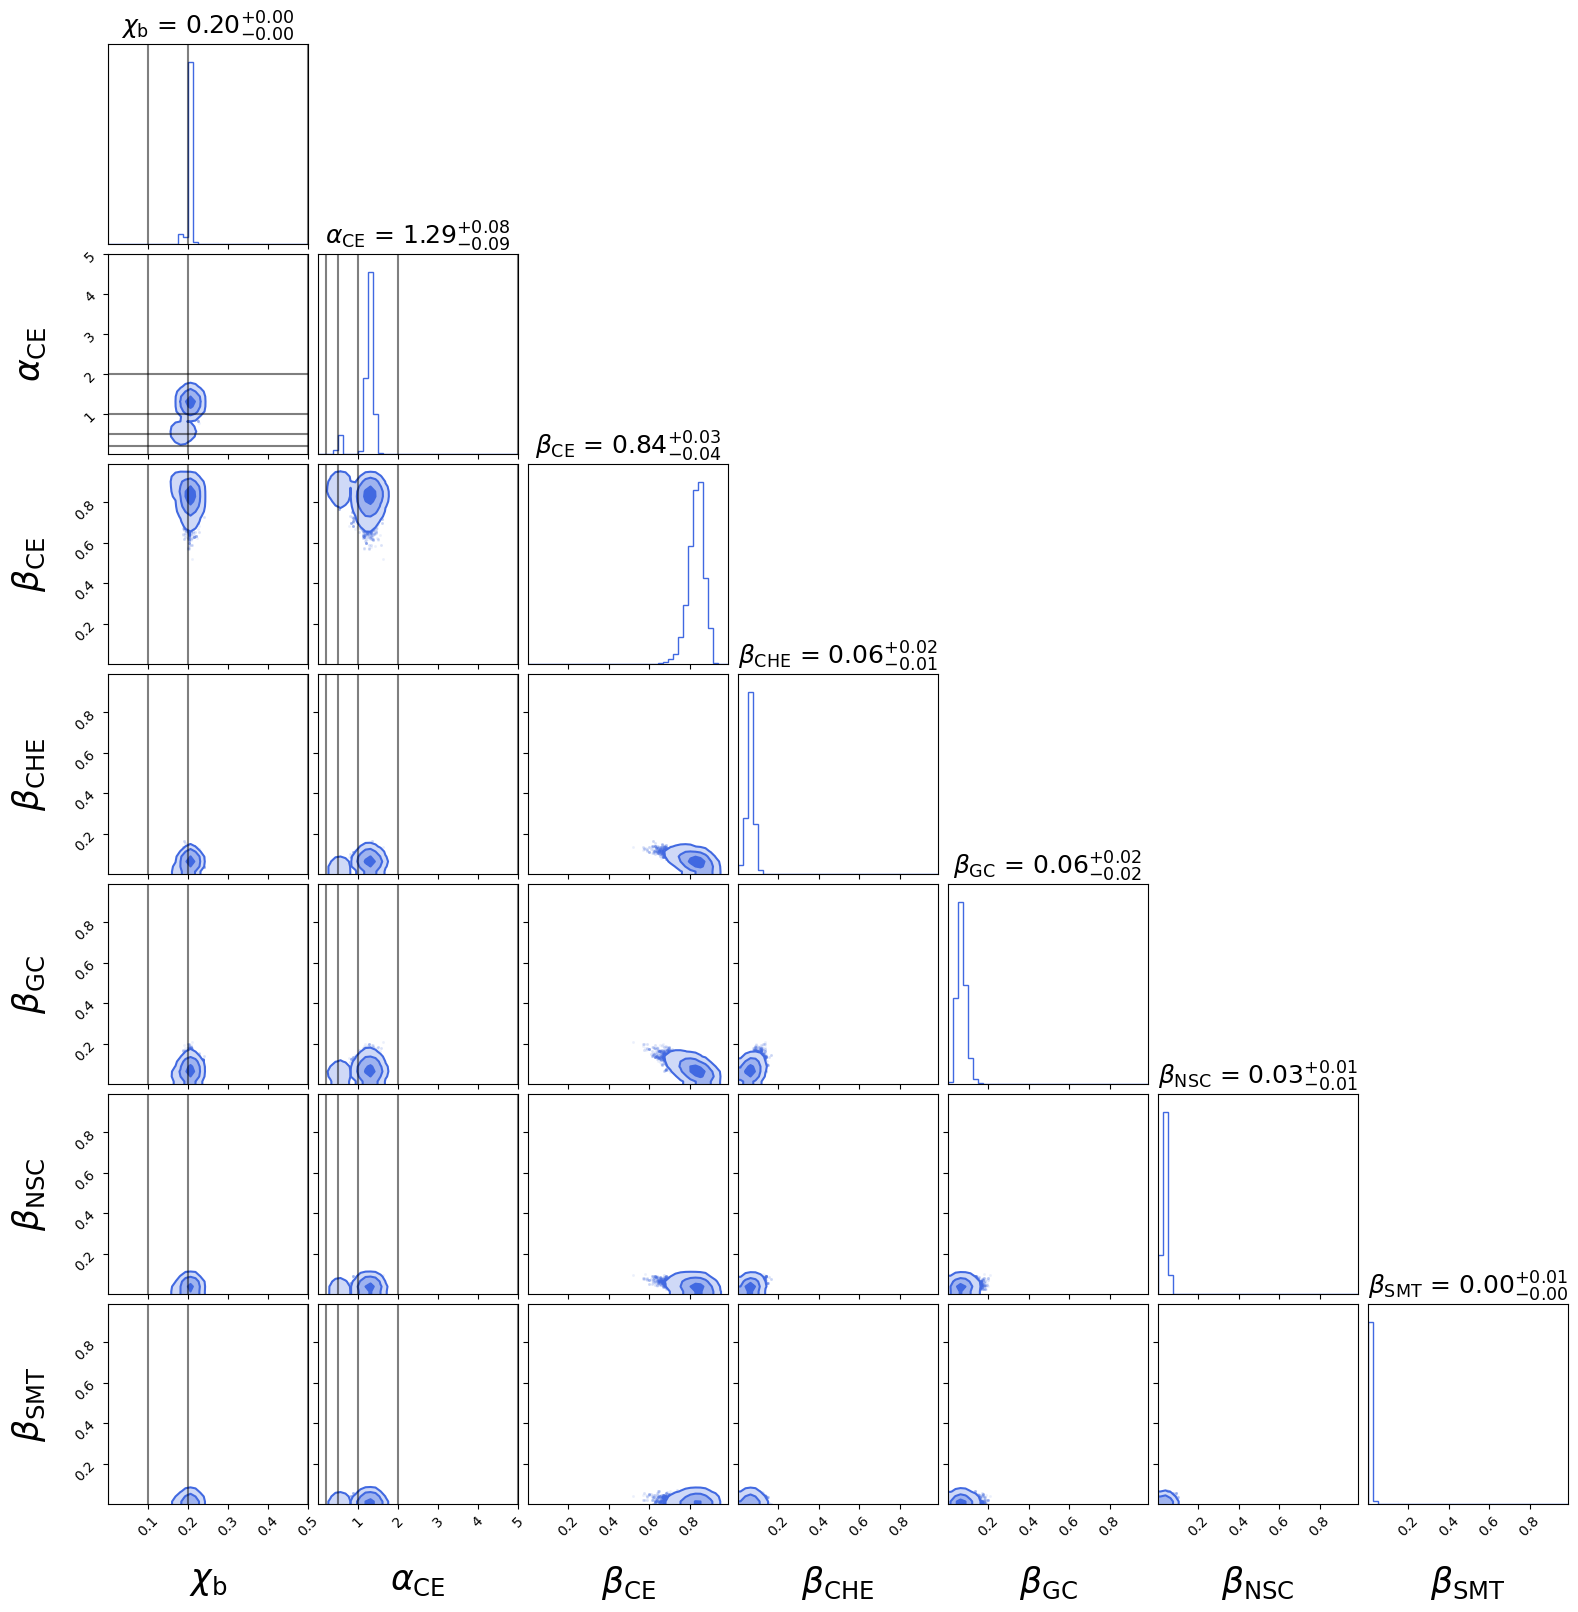

In [4]:
for i, filename in enumerate(glob.glob('/data/wiay/2297403c/amaze_model_select/AMAZE_model_selection/rns/Flows_080724_simevents_chib02/*.hdf5')):
    file = h5py.File(filename, 'r')
    branching_fracs = np.array(file['model_selection']['samples']['block0_values'])
    fig_seed = corner.corner(branching_fracs, **corner_kwargs)


    for xb in chi_b:
        corner.overplot_lines(fig_seed, [xb, None, None, None, None, None, None], color='black', alpha=0.5)

    for a in alpha:
        corner.overplot_lines(fig_seed, [None, a, None, None, None, None, None], color='black', alpha=0.5)

In [3]:
sys.path.append('../')

import populations.bbh_models as read_models
file_path='/data/wiay/2297403c/models_reduced.hdf5'
params = ['mchirp','q', 'chieff', 'z']
channels =['CE', 'CHE', 'GC', 'NSC', 'SMT']

model_names, flow = read_models.get_models(file_path, channels, params, use_flows=True, device='cpu',\
     no_bins=[5,4,4,5,4], sensitivity='midhighlatelow', use_unityweights=False)

/data/wiay/2297403c/conda_envs/amaze/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|██████████| 5/5 [01:25<00:00, 17.04s/it]


In [1]:
flow_filename = '//data/wiay/2297403c/amaze_model_select/AMAZE_model_selection/rns/Flows_050924_simevents_Nevents/output_100events_logalphaCE.hdf5'
flow_file = h5py.File(flow_filename, 'r')

flow_filename_50 = '/data/wiay/2297403c/amaze_model_select/AMAZE_model_selection/rns/Flows_050924_simevents_Nevents/output_50events_logalphaCE.hdf5'
flow_file_50 = h5py.File(flow_filename_50, 'r')

flow_filename_250 = '/data/wiay/2297403c/amaze_model_select/AMAZE_model_selection/rns/Flows_050924_simevents_Nevents/output_250events_logalphaCE.hdf5'
flow_file_250 = h5py.File(flow_filename_250, 'r')

branching_fracs_50 = np.array(flow_file_50['model_selection']['samples']['block0_values'])
branching_fracs_100 = np.array(flow_file['model_selection']['samples']['block0_values'])
branching_fracs_250 = np.array(flow_file_250['model_selection']['samples']['block0_values'])

channels =['CE', 'CHE', 'GC', 'NSC', 'SMT']

converted_betas = np.zeros((3, branching_fracs_50[:,2:].shape[0], branching_fracs_50[:,2:].shape[1]))

for bf, branching_fracs in enumerate([branching_fracs_50, branching_fracs_100,branching_fracs_250]):
    alphas = np.zeros((branching_fracs.shape[0], len(channels)))
    #get alpha for 5 channels given chi_b, alpha_CE in each sample
    for i, samp in enumerate(branching_fracs):
        for cidx, chnl in enumerate(channels):
            smdl = flow[chnl]
            if chnl == 'CE':
                alphas[i, cidx] = smdl.get_alpha(samp[:2])
            else:
                alphas[i, cidx] = smdl.get_alpha([samp[:1][0], 1.])
        print(i)

    converted_betas[bf,:,:] = (branching_fracs[:,2:] * alphas)
    #divide by sum across channels
    converted_betas[bf,:,:] /= converted_betas[bf,:,:].sum(axis=1, keepdims=True)

NameError: name 'h5py' is not defined

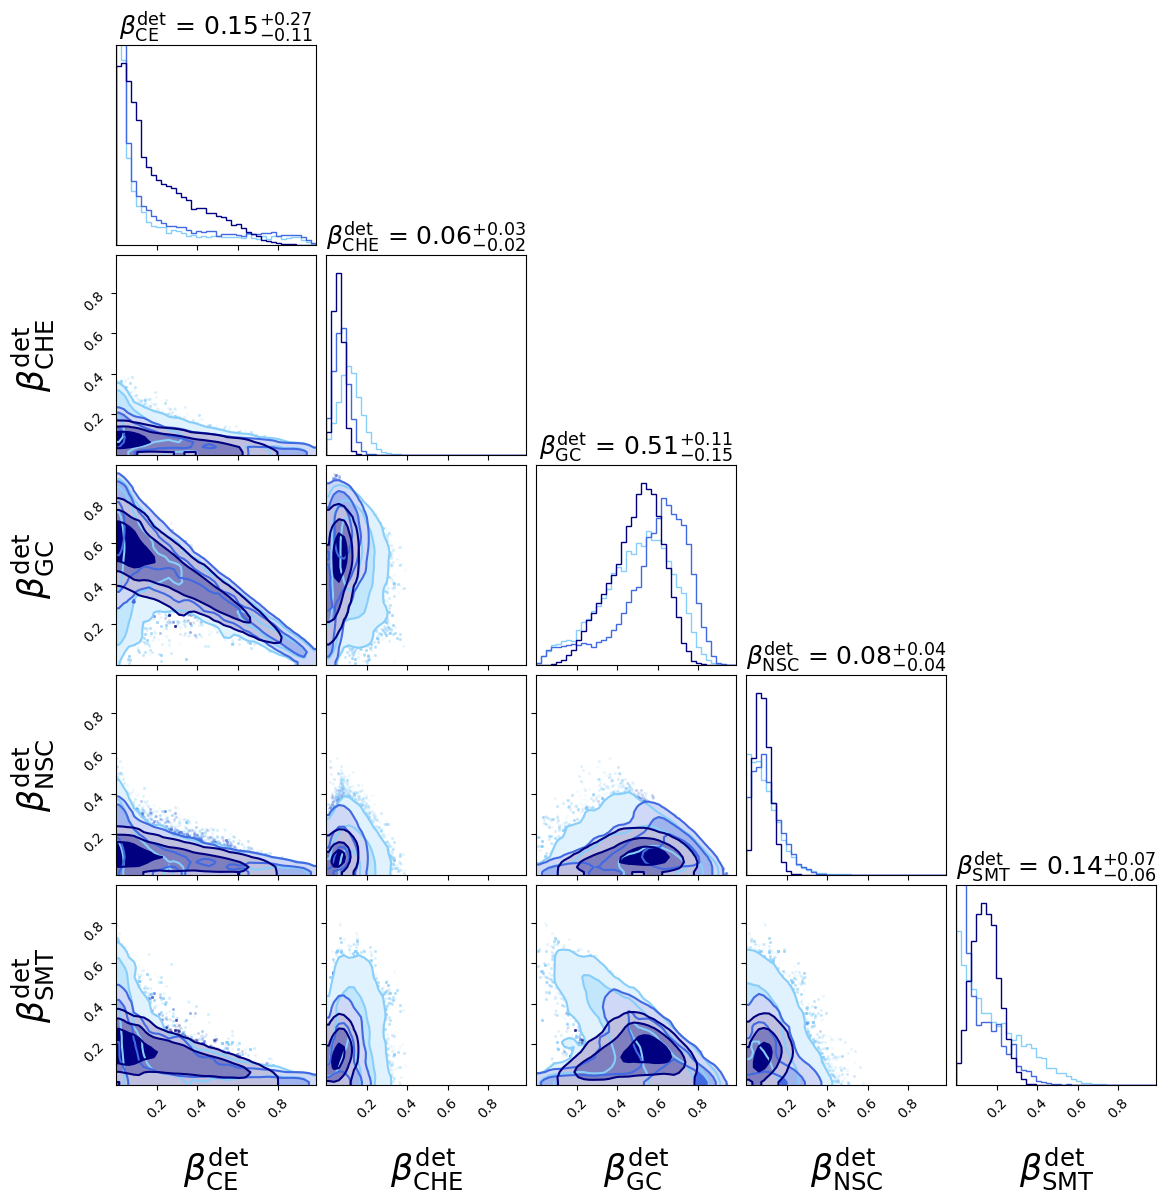

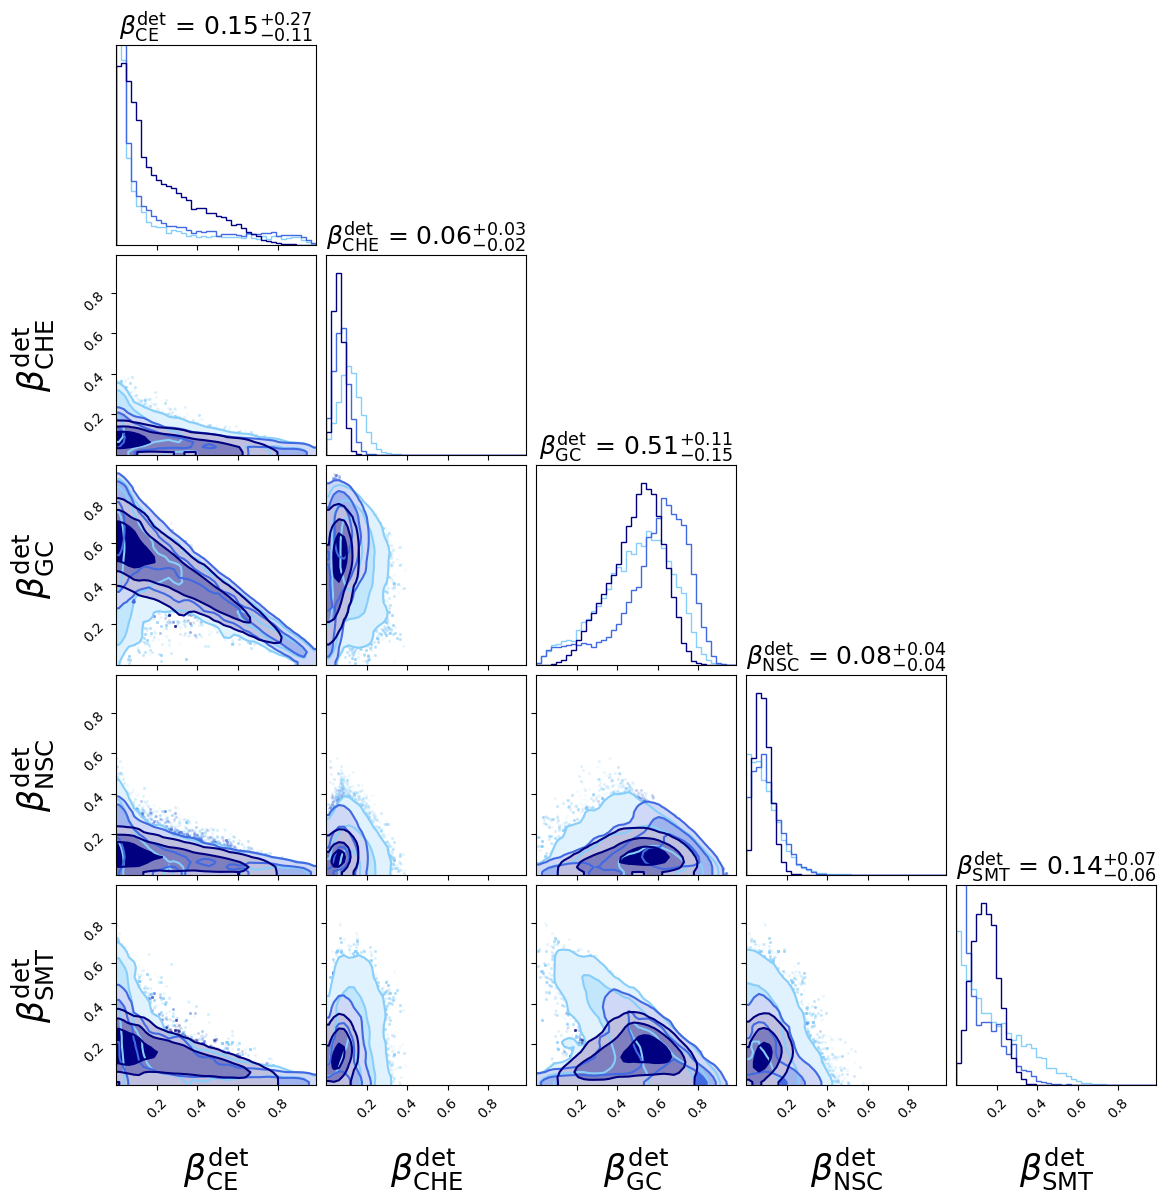

In [5]:
corner_kwargs_det = dict(
    bins=40,
    smooth=0.9,
    color="royalblue",
    #quantiles=[0.16, 0.84],
    levels=(1 - np.exp(-0.5), 1 - np.exp(-2), 1 - np.exp(-9 / 2.0)),
    plot_density=True,
    plot_datapoints=True,
    fill_contours=True,
    show_titles=True,
    hist_kwargs=dict(density=True),
    label_kwargs=dict(fontsize=25),
    title_kwargs=dict(fontsize=18),
    labels=[r'$\beta_{\mathrm{CE}}^{\mathrm{det}}$',r'$\beta_{\mathrm{CHE}}^{\mathrm{det}}$',r'$\beta_{\mathrm{GC}}^{\mathrm{det}}$',r'$\beta_{\mathrm{NSC}}^{\mathrm{det}}$',r'$\beta_{\mathrm{SMT}}^{\mathrm{det}}$'],
    #labels=[r'$\alpha_CE$',r'$\Beta_CE$',r'$\Beta_CHE$',r'$\Beta_GC$',r'$\Beta_NSC$',r'$\Beta_SMT$'],
    range = [(0.,.99),(0.,.99),(0.,.99),(0.,.99),(0.,.99)]
)
corner_kwargs_50 = deepcopy(corner_kwargs_det)
corner_kwargs_50["color"] = "lightskyblue"
corner_kwargs_50["hist_kwargs"]["color"] = "lightskyblue"
corner_kwargs_250 = deepcopy(corner_kwargs_det)
corner_kwargs_250["color"] = "navy"
corner_kwargs_250["hist_kwargs"]["color"] = "navy"

fig_data = corner.corner(converted_betas[0,:,:], **corner_kwargs_50)
corner.corner(converted_betas[1,:,:], fig=fig_data, **corner_kwargs_det)
corner.corner(converted_betas[2,:,:], fig=fig_data, **corner_kwargs_250)

In [11]:
bf_known = [0.0,1.,.40,.05,.25,.05,.25]
alphas = np.zeros((len(channels)))

for cidx, chnl in enumerate(channels):
    smdl = flow[chnl]
    if chnl == 'CE':
        alphas[cidx] = smdl.get_alpha(bf_known[:2])
    else:
        alphas[cidx] = smdl.get_alpha([bf_known[:1][0], 1.])

beta_dets_known = (bf_known[2:] * alphas)
#divide by sum across channels
beta_dets_known /= beta_dets_known.sum()
print(beta_dets_known)

[0.02393738 0.11682178 0.35457923 0.20390251 0.3007591 ]


/tmp/ipykernel_1665831/1998087465.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  alphas[cidx] = smdl.get_alpha(bf_known[:2])
/tmp/ipykernel_1665831/1998087465.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  alphas[cidx] = smdl.get_alpha([bf_known[:1][0], 1.])


In [7]:
beta_dets_known.shape

(128000, 5)